Import libraries and data

In [5]:
import pandas as pd
import numpy as np
import rasterio
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import joblib
import optuna
import matplotlib.pyplot as plt 

# Load data from xls file
data = pd.read_excel("SSC-S1.xlsx")

# Separate features and target
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values


Building model and optimizing the hyperparameters 

In [2]:
# # Define objective function for Optuna optimization
# def objective(trial):
#     # Set hyperparameters to optimize
#     hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50,50), (100,50), (20,60,10), 
#                                                                           (5,10,20), (100, 5, 20), (10, 10), (10, 15), (20,30)
#                                                                          ,(25, 30), (40, 10, 20), (100, 50, 30), (200, 20, 10)])
#     activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
#     solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
#     alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
#     learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
#     max_iter = trial.suggest_int('max_iter', 100, 1000)
#     batch_size = trial.suggest_int('batch_size', 32, 128)

#     # Initialize ANN model with hyperparameters
#     model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
#                          activation=activation,
#                          solver=solver,
#                          alpha=alpha,
#                          learning_rate=learning_rate,
#                          max_iter=max_iter, batch_size=batch_size,
#                          random_state=42)

#     # Set kfold for cross-validation
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#     # Calculate cross-validation score using R2 as evaluation metric
#     score = cross_val_score(model, X, y, cv=kfold, scoring='r2')

#     # Return mean of R2 scores as objective value
#     return score.mean()

# # Run Optuna optimization to find best hyperparameters
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=1000, show_progress_bar=True)

# # Print best hyperparameters found by Optuna
# print("Best hyperparameters: ", study.best_params)


[I 2023-03-03 17:01:56,799] A new study created in memory with name: no-name-ed810754-2889-461a-a3fa-d25e190961fa
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:01:56,890] Trial 0 finished with value: -0.9328230724442088 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.06589540073692421, 'learning_rate': 'constant', 'max_iter': 105, 'batch_size': 93}. Best is trial 0 with value: -0.9328230724442088.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:01:58,469] Trial 1 finished with value: -1.3334695511404429 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.00016609077189092447, 'learning_rate': 'invscaling', 'max_iter': 570, 'batch_size': 75}. Best is trial 0 with value: -0.9328230724442088.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:00,169] Trial 2 finished with value: -1.972792972490834 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.008529985024116336, 'learning_rate': 'constant', 'max_iter': 700, 'batch_size': 70}. Best is trial 0 with value: -0.9328230724442088.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str 

[I 2023-03-03 17:02:00,564] Trial 3 finished with value: -0.461103509536246 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.000555901012704145, 'learning_rate': 'adaptive', 'max_iter': 281, 'batch_size': 33}. Best is trial 3 with value: -0.461103509536246.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:02:03,148] Trial 4 finished with value: -2.6523352123068977 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.06482051285216756, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 72}. Best is trial 3 with value: -0.461103509536246.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (116) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (116) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C

[I 2023-03-03 17:02:03,483] Trial 5 finished with value: -1.8966721566725273 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004329135708002162, 'learning_rate': 'adaptive', 'max_iter': 116, 'batch_size': 45}. Best is trial 3 with value: -0.461103509536246.
[I 2023-03-03 17:02:03,622] Trial 6 finished with value: -0.9761054713355268 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.03377055196100536, 'learning_rate': 'constant', 'max_iter': 610, 'batch_size': 88}. Best is trial 3 with value: -0.461103509536246.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:02:03,990] Trial 7 finished with value: -0.459273844527733 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001207263598449515, 'learning_rate': 'invscaling', 'max_iter': 185, 'batch_size': 46}. Best is trial 7 with value: -0.459273844527733.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (315) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (315) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:04,563] Trial 8 finished with value: -1.8026802698124194 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.010889198031959098, 'learning_rate': 'constant', 'max_iter': 315, 'batch_size': 77}. Best is trial 7 with value: -0.459273844527733.
[I 2023-03-03 17:02:04,958] Trial 9 finished with value: -0.8568317223495849 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.053375017947016226, 'learning_rate': 'adaptive', 'max_iter': 545, 'batch_size': 68}. Best is trial 7 with value: -0.459273844527733.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:02:06,383] Trial 10 finished with value: -0.4999295379699065 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0011389218409323762, 'learning_rate': 'invscaling', 'max_iter': 928, 'batch_size': 120}. Best is trial 7 with value: -0.459273844527733.
[I 2023-03-03 17:02:06,493] Trial 11 finished with value: -0.5453947299024174 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0010838390112508946, 'learning_rate': 'invscaling', 'max_iter': 316, 'batch_size': 33}. Best is trial 7 with value: -0.459273844527733.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (281) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (281) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (281) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (281) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:07,467] Trial 12 finished with value: -0.2929639268297074 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0003464106068112043, 'learning_rate': 'invscaling', 'max_iter': 281, 'batch_size': 48}. Best is trial 12 with value: -0.2929639268297074.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (229) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:02:07,982] Trial 13 finished with value: -0.25670722507405486 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00020186640056368246, 'learning_rate': 'invscaling', 'max_iter': 229, 'batch_size': 52}. Best is trial 13 with value: -0.25670722507405486.
[I 2023-03-03 17:02:08,035] Trial 14 finished with value: -2.586733222253185 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0001431168008395352, 'learning_rate': 'invscaling', 'max_iter': 368, 'batch_size': 58}. Best is trial 13 with value: -0.25670722507405486.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (445) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (445) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:09,034] Trial 15 finished with value: -0.14466169291472936 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002905275908996931, 'learning_rate': 'invscaling', 'max_iter': 445, 'batch_size': 54}. Best is trial 15 with value: -0.14466169291472936.
[I 2023-03-03 17:02:09,109] Trial 16 finished with value: -1.0707142282269082 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00011686199900638275, 'learning_rate': 'invscaling', 'max_iter': 416, 'batch_size': 59}. Best is trial 15 with value: -0.14466169291472936.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (446) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (446) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:10,112] Trial 17 finished with value: -0.14457399517895303 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00030098689509532517, 'learning_rate': 'invscaling', 'max_iter': 446, 'batch_size': 98}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:11,685] Trial 18 finished with value: -0.5086942347509058 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004218371954313589, 'learning_rate': 'invscaling', 'max_iter': 771, 'batch_size': 108}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:12,569] Trial 19 finished with value: -0.15289066574858667 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002947620099818339, 'learning_rate': 'invscaling', 'max_iter': 444, 'batch_size': 102}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:13,379] Trial 20 finished with value: -1.774591084232495 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010103236869402888, 'learning_rate': 'invscaling', 'max_iter': 476, 'batch_size': 126}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:14,244] Trial 21 finished with value: -0.153869943412214 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0003006885631812472, 'learning_rate': 'invscaling', 'max_iter': 439, 'batch_size': 101}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:15,561] Trial 22 finished with value: -0.1540563241638885 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.000648292216993401, 'learning_rate': 'invscaling', 'max_iter': 688, 'batch_size': 110}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:16,757] Trial 23 finished with value: -0.15606388591675358 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002784475141397671, 'learning_rate': 'invscaling', 'max_iter': 477, 'batch_size': 85}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (375) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (375) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:17,605] Trial 24 finished with value: -0.1569497646019232 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00022129509533930138, 'learning_rate': 'invscaling', 'max_iter': 375, 'batch_size': 103}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (625) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1

[I 2023-03-03 17:02:18,260] Trial 25 finished with value: -0.5003783268641829 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0006147752954583087, 'learning_rate': 'invscaling', 'max_iter': 625, 'batch_size': 95}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:19,244] Trial 26 finished with value: -0.14552799281826437 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0018430842056623617, 'learning_rate': 'invscaling', 'max_iter': 505, 'batch_size': 115}. Best is trial 17 with value: -0.14457399517895303.
[I 2023-03-03 17:02:19,334] Trial 27 finished with value: -1.2351010547813606 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0021900007560083346, 'learning_rate': 'constant', 'max_iter': 913, 'batch_size': 122}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:21,157] Trial 28 finished with value: -0.5072904527703253 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00082879252815412, 'learning_rate': 'invscaling', 'max_iter': 719, 'batch_size': 118}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:22,363] Trial 29 finished with value: -0.18191127143721056 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018861160297308941, 'learning_rate': 'adaptive', 'max_iter': 845, 'batch_size': 114}. Best is trial 17 with value: -0.14457399517895303.
[I 2023-03-03 17:02:22,422] Trial 30 finished with value: -5511.454475094042 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00038983143103958737, 'learning_rate': 'constant', 'max_iter': 497, 'batch_size': 92}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (389) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (389) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:23,164] Trial 31 finished with value: -0.1677696700468881 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001987032809606164, 'learning_rate': 'invscaling', 'max_iter': 389, 'batch_size': 101}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:24,199] Trial 32 finished with value: -0.144662331576684 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00017046210681802775, 'learning_rate': 'invscaling', 'max_iter': 524, 'batch_size': 82}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (602) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (602) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:25,359] Trial 33 finished with value: -0.14611649238940222 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00015640817569617757, 'learning_rate': 'invscaling', 'max_iter': 602, 'batch_size': 82}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:26,627] Trial 34 finished with value: -0.33898746070806335 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00010015339219368161, 'learning_rate': 'invscaling', 'max_iter': 524, 'batch_size': 93}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:02:29,872] Trial 35 finished with value: -0.8558876241845059 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0005052965098460929, 'learning_rate': 'invscaling', 'max_iter': 644, 'batch_size': 79}. Best is trial 17 with value: -0.14457399517895303.
[I 2023-03-03 17:02:30,037] Trial 36 finished with value: -0.4321341134102399 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.00019621676297024032, 'learning_rate': 'adaptive', 'max_iter': 557, 'batch_size': 65}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (349) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (349) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (349) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (349) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:31,026] Trial 37 finished with value: -1.5903123203513645 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00044939524832267026, 'learning_rate': 'invscaling', 'max_iter': 349, 'batch_size': 39}. Best is trial 17 with value: -0.14457399517895303.
[I 2023-03-03 17:02:31,087] Trial 38 finished with value: -0.5453274924853329 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0006877874440877104, 'learning_rate': 'constant', 'max_iter': 587, 'batch_size': 74}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:02:31,734] Trial 39 finished with value: -0.5435504974905973 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.00015000908094558635, 'learning_rate': 'invscaling', 'max_iter': 502, 'batch_size': 87}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 17:02:32,068] Trial 40 finished with value: -0.842238273760147 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002738326751643469, 'learning_rate': 'adaptive', 'max_iter': 442, 'batch_size': 108}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:33,201] Trial 41 finished with value: -0.1449047743244957 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00019336531250464632, 'learning_rate': 'invscaling', 'max_iter': 577, 'batch_size': 85}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (672) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (672) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:34,490] Trial 42 finished with value: -0.15222184424915394 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004070232080092824, 'learning_rate': 'invscaling', 'max_iter': 672, 'batch_size': 82}. Best is trial 17 with value: -0.14457399517895303.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:35,610] Trial 43 finished with value: -0.14441872149763615 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00025117038253846564, 'learning_rate': 'invscaling', 'max_iter': 558, 'batch_size': 90}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:36,357] Trial 44 finished with value: -0.5105955662134233 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00014026327630411317, 'learning_rate': 'invscaling', 'max_iter': 555, 'batch_size': 96}. Best is trial 43 with value: -0.14441872149763615.
[I 2023-03-03 17:02:36,417] Trial 45 finished with value: -0.5453306799847042 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0002522773519546545, 'learning_rate': 'invscaling', 'max_iter': 580, 'batch_size': 90}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:02:37,749] Trial 46 finished with value: -1.4717292318636934 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00017639846592877012, 'learning_rate': 'constant', 'max_iter': 640, 'batch_size': 70}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarni

[I 2023-03-03 17:02:38,046] Trial 47 finished with value: -2.441302366493111 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0002203509463325923, 'learning_rate': 'invscaling', 'max_iter': 736, 'batch_size': 65}. Best is trial 43 with value: -0.14441872149763615.
[I 2023-03-03 17:02:38,253] Trial 48 finished with value: -0.6903905661787146 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0003178059858851052, 'learning_rate': 'adaptive', 'max_iter': 998, 'batch_size': 78}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:02:38,903] Trial 49 finished with value: -0.21451252275374605 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0001223445949262711, 'learning_rate': 'invscaling', 'max_iter': 409, 'batch_size': 85}. Best is trial 43 with value: -0.14441872149763615.
[I 2023-03-03 17:02:39,343] Trial 50 finished with value: -0.6550937277264132 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0005248063832759823, 'learning_rate': 'invscaling', 'max_iter': 342, 'batch_size': 97}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:02:40,347] Trial 51 finished with value: -0.1447613602431821 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0008439085068409401, 'learning_rate': 'invscaling', 'max_iter': 521, 'batch_size': 74}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (461) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (461) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:41,242] Trial 52 finished with value: -0.15003035132702297 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.000368074297464539, 'learning_rate': 'invscaling', 'max_iter': 461, 'batch_size': 57}. Best is trial 43 with value: -0.14441872149763615.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:42,338] Trial 53 finished with value: -0.14433080148502314 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00017973380145868488, 'learning_rate': 'invscaling', 'max_iter': 547, 'batch_size': 75}. Best is trial 53 with value: -0.14433080148502314.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:43,417] Trial 54 finished with value: -0.14446331177985017 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00033499728969492974, 'learning_rate': 'invscaling', 'max_iter': 532, 'batch_size': 63}. Best is trial 53 with value: -0.14433080148502314.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (304) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (304) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:43,977] Trial 55 finished with value: -0.17081743020715306 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00024995427296454147, 'learning_rate': 'invscaling', 'max_iter': 304, 'batch_size': 53}. Best is trial 53 with value: -0.14433080148502314.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (234) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (234) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:02:44,636] Trial 56 finished with value: -0.46300144555925754 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.00013425418536811365, 'learning_rate': 'invscaling', 'max_iter': 234, 'batch_size': 63}. Best is trial 53 with value: -0.14433080148502314.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:02:45,640] Trial 57 finished with value: -0.4948026552985171 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0003155991760502463, 'learning_rate': 'invscaling', 'max_iter': 407, 'batch_size': 70}. Best is trial 53 with value: -0.14433080148502314.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:48,153] Trial 58 finished with value: -0.11390529846357378 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001661357002023785, 'learning_rate': 'invscaling', 'max_iter': 537, 'batch_size': 43}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:50,220] Trial 59 finished with value: -0.1418498612537929 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004557170657592905, 'learning_rate': 'invscaling', 'max_iter': 458, 'batch_size': 40}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (608) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (608) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (608) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (608) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:52,989] Trial 60 finished with value: -0.12540304764210383 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004961754113487435, 'learning_rate': 'constant', 'max_iter': 608, 'batch_size': 41}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (664) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (664) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (664) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (664) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:55,941] Trial 61 finished with value: -0.15064001458075887 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000474414829410866, 'learning_rate': 'constant', 'max_iter': 664, 'batch_size': 35}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (620) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (620) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (620) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (620) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:02:58,938] Trial 62 finished with value: -0.12893893678411533 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003673277135961476, 'learning_rate': 'constant', 'max_iter': 620, 'batch_size': 42}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:02,422] Trial 63 finished with value: -0.19965041000194686 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039236851699091404, 'learning_rate': 'constant', 'max_iter': 754, 'batch_size': 42}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (615) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (615) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (615) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (615) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:05,214] Trial 64 finished with value: -0.12215355986243628 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002424305027525501, 'learning_rate': 'constant', 'max_iter': 615, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (616) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (616) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (616) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (616) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:08,059] Trial 65 finished with value: -0.12085289912648056 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002268419474950064, 'learning_rate': 'constant', 'max_iter': 616, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:03:11,377] Trial 66 finished with value: -0.1225034333115628 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012334259748562407, 'learning_rate': 'constant', 'max_iter': 610, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:03:15,111] Trial 67 finished with value: -0.1619786787540328 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011720530581797267, 'learning_rate': 'constant', 'max_iter': 786, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:18,070] Trial 68 finished with value: -0.12876304959726664 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014603219365086605, 'learning_rate': 'constant', 'max_iter': 613, 'batch_size': 45}. Best is trial 58 with value: -0.11390529846357378.
[I 2023-03-03 17:03:18,371] Trial 69 finished with value: -0.7650008776886732 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00010181351765253047, 'learning_rate': 'constant', 'max_iter': 615, 'batch_size': 46}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:03:21,437] Trial 70 finished with value: -0.11720304836625535 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014021547440883113, 'learning_rate': 'constant', 'max_iter': 688, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:24,734] Trial 71 finished with value: -0.11872407521806631 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014554878061167245, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (668) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (668) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (668) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (668) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:27,690] Trial 72 finished with value: -0.11722946526189384 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014981515618453273, 'learning_rate': 'constant', 'max_iter': 668, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:30,779] Trial 73 finished with value: -0.1162071751270088 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001651789217187402, 'learning_rate': 'constant', 'max_iter': 702, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:33,821] Trial 74 finished with value: -0.11593753788483312 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015547331307182247, 'learning_rate': 'constant', 'max_iter': 708, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:03:35,782] Trial 75 finished with value: -0.2480548513560814 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001654762684400629, 'learning_rate': 'constant', 'max_iter': 705, 'batch_size': 56}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:39,166] Trial 76 finished with value: -0.22543736269842712 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021939023825877921, 'learning_rate': 'constant', 'max_iter': 782, 'batch_size': 36}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:03:42,541] Trial 77 finished with value: -0.12444175610940862 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015508215250118132, 'learning_rate': 'constant', 'max_iter': 820, 'batch_size': 51}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (681) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (681) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:03:44,193] Trial 78 finished with value: -0.6034028689418859 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00022207808307386664, 'learning_rate': 'constant', 'max_iter': 681, 'batch_size': 60}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:03:46,169] Trial 79 finished with value: -0.23475228215370128 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012327162725634907, 'learning_rate': 'constant', 'max_iter': 721, 'batch_size': 54}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (812) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (812) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (812) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (812) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:49,257] Trial 80 finished with value: -0.21131309137587095 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001807246105896902, 'learning_rate': 'constant', 'max_iter': 812, 'batch_size': 47}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (665) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (665) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (665) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (665) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:52,190] Trial 81 finished with value: -0.11709355940259711 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010284780122635349, 'learning_rate': 'constant', 'max_iter': 665, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (646) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (646) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:03:54,045] Trial 82 finished with value: -0.3045773990379788 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015340550450712625, 'learning_rate': 'constant', 'max_iter': 646, 'batch_size': 55}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:03:57,313] Trial 83 finished with value: -0.1870855832181567 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001178028476205348, 'learning_rate': 'constant', 'max_iter': 743, 'batch_size': 44}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:00,287] Trial 84 finished with value: -0.13800492757461041 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010500046819881948, 'learning_rate': 'constant', 'max_iter': 700, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.
[I 2023-03-03 17:04:01,688] Trial 85 finished with value: -0.2266549328886925 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013646224803947536, 'learning_rate': 'constant', 'max_iter': 653, 'batch_size': 51}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:04:03,579] Trial 86 finished with value: -1.0931358887367537 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020275390099947207, 'learning_rate': 'constant', 'max_iter': 689, 'batch_size': 38}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:07,509] Trial 87 finished with value: -0.15262089404091178 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002670707018243506, 'learning_rate': 'constant', 'max_iter': 716, 'batch_size': 32}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (763) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (763) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:04:09,253] Trial 88 finished with value: -1.7854409484891136 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001762383356332444, 'learning_rate': 'constant', 'max_iter': 763, 'batch_size': 53}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:04:10,552] Trial 89 finished with value: -0.7089607542001297 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010260590977889612, 'learning_rate': 'constant', 'max_iter': 666, 'batch_size': 60}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:13,736] Trial 90 finished with value: -0.18051091231533292 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001389306930856132, 'learning_rate': 'constant', 'max_iter': 734, 'batch_size': 44}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (635) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (635) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (635) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (635) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:16,362] Trial 91 finished with value: -0.12080468078063981 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012630817540876268, 'learning_rate': 'constant', 'max_iter': 635, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:19,014] Trial 92 finished with value: -0.12444228674454383 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015552117056771375, 'learning_rate': 'constant', 'max_iter': 633, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:20,110] Trial 93 finished with value: -1.3595879870887295 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022635375976391768, 'learning_rate': 'constant', 'max_iter': 589, 'batch_size': 52}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:04:22,253] Trial 94 finished with value: -0.2686625603329157 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019117666105387444, 'learning_rate': 'constant', 'max_iter': 682, 'batch_size': 58}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:25,156] Trial 95 finished with value: -0.1452887469109231 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001295045644925222, 'learning_rate': 'constant', 'max_iter': 653, 'batch_size': 43}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (697) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (697) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (697) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (697) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:28,075] Trial 96 finished with value: -0.12832413121643854 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00025103124779924746, 'learning_rate': 'adaptive', 'max_iter': 697, 'batch_size': 46}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:04:28,907] Trial 97 finished with value: -0.44833645687792584 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016559038664537497, 'learning_rate': 'constant', 'max_iter': 575, 'batch_size': 55}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (633) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:31,714] Trial 98 finished with value: -1.3300132068130446 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011084907719419023, 'learning_rate': 'constant', 'max_iter': 633, 'batch_size': 36}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (873) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (873) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (873) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (873) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:35,434] Trial 99 finished with value: -0.2839550203221357 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013343298042993624, 'learning_rate': 'constant', 'max_iter': 873, 'batch_size': 38}. Best is trial 58 with value: -0.11390529846357378.
[I 2023-03-03 17:04:35,555] Trial 100 finished with value: -0.6155602277822693 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00020273163209730066, 'learning_rate': 'constant', 'max_iter': 109, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (599) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (599) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (599) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (599) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:38,115] Trial 101 finished with value: -0.1219443901464865 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001168773169031624, 'learning_rate': 'constant', 'max_iter': 599, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:40,832] Trial 102 finished with value: -0.12213866280156864 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011772481094641451, 'learning_rate': 'constant', 'max_iter': 591, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:43,931] Trial 103 finished with value: -0.15822268709064988 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011385895631739115, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 46}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (595) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (595) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (595) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (595) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:45,603] Trial 104 finished with value: -0.3635460264239544 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014707078480757295, 'learning_rate': 'constant', 'max_iter': 595, 'batch_size': 52}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:04:47,496] Trial 105 finished with value: -0.2840621491798364 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010232665415091725, 'learning_rate': 'constant', 'max_iter': 666, 'batch_size': 57}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:50,648] Trial 106 finished with value: -1.2843249887756611 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001247097357415999, 'learning_rate': 'constant', 'max_iter': 561, 'batch_size': 44}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:04:51,821] Trial 107 finished with value: -0.42551202490543416 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001717816781846669, 'learning_rate': 'constant', 'max_iter': 486, 'batch_size': 62}. Best is trial 58 with value: -0.11390529846357378.
[I 2023-03-03 17:04:52,125] Trial 108 finished with value: -0.5997196099954282 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00013735892224279442, 'learning_rate': 'adaptive', 'max_iter': 630, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:04:55,645] Trial 109 finished with value: -0.1979904278220154 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028899428824275165, 'learning_rate': 'constant', 'max_iter': 745, 'batch_size': 40}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:04:56,794] Trial 110 finished with value: -0.1708180538114097 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019449814288745207, 'learning_rate': 'constant', 'max_iter': 676, 'batch_size': 54}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:04:59,153] Trial 111 finished with value: -0.14253114087059 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015637182716933786, 'learning_rate': 'constant', 'max_iter': 537, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:01,665] Trial 112 finished with value: -0.12477428337832949 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001154101869299961, 'learning_rate': 'constant', 'max_iter': 596, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:05:02,286] Trial 113 finished with value: -1.0479544693990577 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022447862799860997, 'learning_rate': 'constant', 'max_iter': 137, 'batch_size': 47}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (653) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:04,090] Trial 114 finished with value: -0.29723468883865145 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017777711563407575, 'learning_rate': 'constant', 'max_iter': 653, 'batch_size': 52}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:06,939] Trial 115 finished with value: -0.3520709492498496 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010050339693319452, 'learning_rate': 'constant', 'max_iter': 515, 'batch_size': 41}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:09,200] Trial 116 finished with value: -0.2424644731762867 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00013461931217784428, 'learning_rate': 'constant', 'max_iter': 575, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (704) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (704) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (704) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (704) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:11,175] Trial 117 finished with value: -1.0974079017331382 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00023903608729010302, 'learning_rate': 'constant', 'max_iter': 704, 'batch_size': 45}. Best is trial 58 with value: -0.11390529846357378.
[I 2023-03-03 17:05:11,246] Trial 118 finished with value: -0.5453304357450144 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00016090069801508018, 'learning_rate': 'constant', 'max_iter': 627, 'batch_size': 56}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:15,228] Trial 119 finished with value: -0.18292942368768955 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001216090423228586, 'learning_rate': 'constant', 'max_iter': 731, 'batch_size': 42}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (780) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (780) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:05:16,774] Trial 120 finished with value: -0.5678384922186117 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020182558181204883, 'learning_rate': 'constant', 'max_iter': 780, 'batch_size': 54}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (603) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (603) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (603) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (603) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:19,333] Trial 121 finished with value: -0.12209713233170412 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012118715421957928, 'learning_rate': 'constant', 'max_iter': 603, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (601) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (601) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (601) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (601) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:21,870] Trial 122 finished with value: -0.11901077817000738 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001134021918634086, 'learning_rate': 'constant', 'max_iter': 601, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:24,246] Trial 123 finished with value: -0.1148953585158583 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011583483423173499, 'learning_rate': 'constant', 'max_iter': 546, 'batch_size': 47}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:25,798] Trial 124 finished with value: -0.926404482732902 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014697559818511563, 'learning_rate': 'constant', 'max_iter': 544, 'batch_size': 47}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (644) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (644) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (644) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (644) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:28,624] Trial 125 finished with value: -0.14162085770629465 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010057739806323165, 'learning_rate': 'constant', 'max_iter': 644, 'batch_size': 43}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:30,274] Trial 126 finished with value: -0.4126405322555879 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012899119108996136, 'learning_rate': 'adaptive', 'max_iter': 558, 'batch_size': 52}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (671) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (671) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:05:31,274] Trial 127 finished with value: -0.324649361710212 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000166771307221206, 'learning_rate': 'constant', 'max_iter': 671, 'batch_size': 59}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:05:34,660] Trial 128 finished with value: -0.13881618446409907 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014669643769607216, 'learning_rate': 'constant', 'max_iter': 689, 'batch_size': 47}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:37,312] Trial 129 finished with value: -1.4450914467251033 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011383494434698258, 'learning_rate': 'constant', 'max_iter': 569, 'batch_size': 45}. Best is trial 58 with value: -0.11390529846357378.
[I 2023-03-03 17:05:37,645] Trial 130 finished with value: -0.6698409822721031 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001768586423684644, 'learning_rate': 'constant', 'max_iter': 606, 'batch_size': 51}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:05:40,379] Trial 131 finished with value: -0.122138663242735 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011965691977347037, 'learning_rate': 'constant', 'max_iter': 591, 'batch_size': 49}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (651) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (651) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:05:42,367] Trial 132 finished with value: -0.2993146228294872 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013273361050172974, 'learning_rate': 'constant', 'max_iter': 651, 'batch_size': 55}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (617) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (617) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (617) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (617) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:45,193] Trial 133 finished with value: -0.12080851137072068 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015465519646080071, 'learning_rate': 'constant', 'max_iter': 617, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (625) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (625) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:05:47,119] Trial 134 finished with value: -0.3276768510033745 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019518118262104928, 'learning_rate': 'constant', 'max_iter': 625, 'batch_size': 53}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:50,342] Trial 135 finished with value: -0.1596641964537353 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015073103974532889, 'learning_rate': 'constant', 'max_iter': 700, 'batch_size': 44}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (661) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (661) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (661) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (661) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:52,575] Trial 136 finished with value: -0.18377298219559107 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011326961021538328, 'learning_rate': 'constant', 'max_iter': 661, 'batch_size': 39}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str 

[I 2023-03-03 17:05:55,252] Trial 137 finished with value: -4.990308790190888 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00016562450253089538, 'learning_rate': 'constant', 'max_iter': 757, 'batch_size': 46}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:05:57,393] Trial 138 finished with value: -0.21250104224141658 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021334819594985511, 'learning_rate': 'constant', 'max_iter': 504, 'batch_size': 51}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:00,972] Trial 139 finished with value: -1.483848741978887 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00013783078071887567, 'learning_rate': 'constant', 'max_iter': 714, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (613) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:04,364] Trial 140 finished with value: -0.12661885670211176 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028292839759936326, 'learning_rate': 'constant', 'max_iter': 613, 'batch_size': 42}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:06,940] Trial 141 finished with value: -0.12670167451221043 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010030419066682668, 'learning_rate': 'constant', 'max_iter': 589, 'batch_size': 50}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:09,510] Trial 142 finished with value: -0.12015747080224277 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012246244244198945, 'learning_rate': 'constant', 'max_iter': 537, 'batch_size': 48}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:11,957] Trial 143 finished with value: -0.11782440595163668 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012957193702514883, 'learning_rate': 'constant', 'max_iter': 535, 'batch_size': 45}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:13,970] Trial 144 finished with value: -0.11425689879295117 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017923897960303494, 'learning_rate': 'constant', 'max_iter': 531, 'batch_size': 45}. Best is trial 58 with value: -0.11390529846357378.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:15,958] Trial 145 finished with value: -0.11196810885121714 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019141487727701402, 'learning_rate': 'constant', 'max_iter': 521, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:17,803] Trial 146 finished with value: -0.1201774328436335 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018735362032787538, 'learning_rate': 'constant', 'max_iter': 478, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:19,727] Trial 147 finished with value: -0.11868945411331122 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001816216250121452, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:21,591] Trial 148 finished with value: -0.12182233795886148 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001887517944086879, 'learning_rate': 'adaptive', 'max_iter': 459, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:23,485] Trial 149 finished with value: -0.11498687758657304 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00032371647610511235, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:25,461] Trial 150 finished with value: -0.11481807367140391 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021264891615618473, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:27,451] Trial 151 finished with value: -0.11376402365399563 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002807166852210857, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:29,361] Trial 152 finished with value: -0.11415470376755019 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00032275979825387055, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:31,369] Trial 153 finished with value: -0.11346435175961189 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00035357332430396187, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:33,368] Trial 154 finished with value: -0.11333913166320646 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003309363393112664, 'learning_rate': 'adaptive', 'max_iter': 493, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:35,016] Trial 155 finished with value: -0.132781187697526 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003114608307592325, 'learning_rate': 'adaptive', 'max_iter': 433, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:36,926] Trial 156 finished with value: -0.11389104352703168 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003591475606224271, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:39,029] Trial 157 finished with value: -0.11328411507880709 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003368239137140729, 'learning_rate': 'adaptive', 'max_iter': 517, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:40,981] Trial 158 finished with value: -0.11370917420332076 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003521258074936179, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:42,903] Trial 159 finished with value: -0.11305283660788316 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003826247950612152, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:06:43,217] Trial 160 finished with value: -0.556244424389433 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00032235061659815237, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:06:45,113] Trial 161 finished with value: -0.1139292682338536 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003652022006052785, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:47,178] Trial 162 finished with value: -0.11392926953647012 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039275503256061886, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:49,243] Trial 163 finished with value: -0.1137091755014874 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003811817590441999, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:51,239] Trial 164 finished with value: -0.11382163546428621 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004071895741995074, 'learning_rate': 'adaptive', 'max_iter': 489, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:53,187] Trial 165 finished with value: -0.11310327806783071 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00040575073748340656, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:06:55,296] Trial 166 finished with value: -0.11359565878635643 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004036745698431848, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 17:06:56,930] Trial 167 finished with value: -0.3735530116292824 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0003983718568686041, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:06:58,823] Trial 168 finished with value: -0.11352789631358395 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043015802429262324, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (422) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:00,470] Trial 169 finished with value: -0.13853461470300985 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00044105552147533035, 'learning_rate': 'adaptive', 'max_iter': 422, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:02,407] Trial 170 finished with value: -0.11388254241834743 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00036731886439925947, 'learning_rate': 'adaptive', 'max_iter': 489, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:04,486] Trial 171 finished with value: -0.11388254213464948 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00036173780213687065, 'learning_rate': 'adaptive', 'max_iter': 489, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:06,446] Trial 172 finished with value: -0.12012458904767778 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003703591640739951, 'learning_rate': 'adaptive', 'max_iter': 460, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:08,328] Trial 173 finished with value: -0.11288141734730912 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005195450073012658, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:10,340] Trial 174 finished with value: -0.11260343267550917 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005054942491080193, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:12,340] Trial 175 finished with value: -0.11243569746876325 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005216747419912078, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:14,320] Trial 176 finished with value: -0.1124012186773355 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005016386485108698, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:16,109] Trial 177 finished with value: -0.3345851165902875 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0005740294694598953, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:17,811] Trial 178 finished with value: -0.12503412461834035 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005010104746705702, 'learning_rate': 'adaptive', 'max_iter': 449, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:20,127] Trial 179 finished with value: -0.11319691557459563 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004547883191446326, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:22,376] Trial 180 finished with value: -0.11318775814901043 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00047413656030963924, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:24,322] Trial 181 finished with value: -0.1132667236343802 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004720941677187737, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:26,231] Trial 182 finished with value: -0.11326672387485903 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004805786360559053, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:28,112] Trial 183 finished with value: -0.1132667247722973 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000512239977617663, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:29,981] Trial 184 finished with value: -0.11295019303461226 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005479283814610931, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:31,996] Trial 185 finished with value: -0.1129316710032227 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005529028352780032, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:34,106] Trial 186 finished with value: -0.11293351506156797 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005521950075632932, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:36,084] Trial 187 finished with value: -0.11295751222806905 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005793006605498612, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:38,035] Trial 188 finished with value: -0.11295751362906588 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006124153739941757, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:40,058] Trial 189 finished with value: -0.11317699038578607 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000631665820168545, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:42,164] Trial 190 finished with value: -0.11295019535988611 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006137015673571641, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:44,215] Trial 191 finished with value: -0.11311395042990027 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006083282884687533, 'learning_rate': 'adaptive', 'max_iter': 517, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:46,161] Trial 192 finished with value: -0.11293167202490317 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005780633192211949, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:48,192] Trial 193 finished with value: -0.11521165614320261 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000654577619334411, 'learning_rate': 'adaptive', 'max_iter': 546, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:50,320] Trial 194 finished with value: -0.11595724601688304 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006113970700442124, 'learning_rate': 'adaptive', 'max_iter': 552, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:52,723] Trial 195 finished with value: -0.12129860527738186 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000767147173069163, 'learning_rate': 'adaptive', 'max_iter': 465, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:54,814] Trial 196 finished with value: -0.11396627255363065 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005697820372280369, 'learning_rate': 'adaptive', 'max_iter': 527, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:07:56,863] Trial 197 finished with value: -0.11317941611797622 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007071010710171924, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:07:58,167] Trial 198 finished with value: -0.310593595558713 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0006854020160993878, 'learning_rate': 'adaptive', 'max_iter': 465, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:00,178] Trial 199 finished with value: -0.11239738220527076 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000560607931248465, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:08:00,502] Trial 200 finished with value: -0.646603800496526 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005522394314606707, 'learning_rate': 'adaptive', 'max_iter': 543, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:08:02,586] Trial 201 finished with value: -0.11262735081635325 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007426535878744229, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:04,596] Trial 202 finished with value: -0.11257089833746088 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007769537844651132, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:06,602] Trial 203 finished with value: -0.11383204123326314 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007680013615519215, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:08,558] Trial 204 finished with value: -0.11357802366743974 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000608601098998559, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:10,693] Trial 205 finished with value: -0.11865731360067225 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006952353044999001, 'learning_rate': 'adaptive', 'max_iter': 563, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:12,732] Trial 206 finished with value: -0.11535387638297996 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008554522687064061, 'learning_rate': 'adaptive', 'max_iter': 535, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:14,658] Trial 207 finished with value: -0.11257371253400303 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005564661296350089, 'learning_rate': 'adaptive', 'max_iter': 506, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:16,485] Trial 208 finished with value: -0.11711647728993402 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005463455950942126, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:18,345] Trial 209 finished with value: -0.12197411190332494 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006242354046144024, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:19,513] Trial 210 finished with value: -0.3027399804176369 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008887187913379136, 'learning_rate': 'adaptive', 'max_iter': 443, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:21,488] Trial 211 finished with value: -0.11367792814151208 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005427814092735342, 'learning_rate': 'adaptive', 'max_iter': 525, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:23,516] Trial 212 finished with value: -0.1124028201129331 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007048070852387566, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:25,550] Trial 213 finished with value: -0.11245561325377981 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007098570664803407, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:27,622] Trial 214 finished with value: -0.11259147385845365 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006378144275395771, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:29,804] Trial 215 finished with value: -0.11852247222545778 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009465872318751449, 'learning_rate': 'adaptive', 'max_iter': 553, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:31,457] Trial 216 finished with value: -1.027899253918155 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0007486671570966314, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:34,391] Trial 217 finished with value: -0.3217721852787759 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000574419774585993, 'learning_rate': 'adaptive', 'max_iter': 535, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:35,755] Trial 218 finished with value: -1.3839160964368555 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006512677970532902, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:38,226] Trial 219 finished with value: -0.6339767086318748 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007805030163446124, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:40,389] Trial 220 finished with value: -0.7315152855670364 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005055320017285436, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:42,249] Trial 221 finished with value: -0.11244693756146398 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006311793964870174, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:44,139] Trial 222 finished with value: -0.11244693496058882 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005707755715099984, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:45,973] Trial 223 finished with value: -0.11868949887288091 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006840899044997718, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:47,785] Trial 224 finished with value: -0.1270760725096692 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005416486006529416, 'learning_rate': 'adaptive', 'max_iter': 453, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:49,759] Trial 225 finished with value: -0.11257372738656732 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010029796706962268, 'learning_rate': 'adaptive', 'max_iter': 506, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:51,251] Trial 226 finished with value: -0.9645206882832895 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010324035128657265, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:53,102] Trial 227 finished with value: -0.12087432675129337 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000824116540337785, 'learning_rate': 'adaptive', 'max_iter': 475, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:54,415] Trial 228 finished with value: -0.12056682698925565 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007414195597514894, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:56,460] Trial 229 finished with value: -0.11703973832392359 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005934835907920211, 'learning_rate': 'adaptive', 'max_iter': 550, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:08:58,453] Trial 230 finished with value: -0.11268001615538722 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009521472459899591, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:00,332] Trial 231 finished with value: -0.11269833116700587 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011363747154600656, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:02,485] Trial 232 finished with value: -0.11383958908247274 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011622361602821806, 'learning_rate': 'adaptive', 'max_iter': 525, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:04,449] Trial 233 finished with value: -0.11270295904990894 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009728078228538385, 'learning_rate': 'adaptive', 'max_iter': 497, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:06,598] Trial 234 finished with value: -1.559173612550644 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009382483747187324, 'learning_rate': 'adaptive', 'max_iter': 478, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:08,517] Trial 235 finished with value: -0.11337983069635342 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008281555953902189, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:10,482] Trial 236 finished with value: -0.11261964310592809 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012869478135485524, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:12,372] Trial 237 finished with value: -0.11261962739185001 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009691700585001044, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:14,243] Trial 238 finished with value: -0.12218473776256773 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010388455391321914, 'learning_rate': 'adaptive', 'max_iter': 458, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:09:14,414] Trial 239 finished with value: -0.7358881740467303 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0013122834905223743, 'learning_rate': 'adaptive', 'max_iter': 480, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:16,456] Trial 240 finished with value: -0.112943886460936 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001218835148619244, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:18,462] Trial 241 finished with value: -0.11282287819790424 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001039644603257323, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:20,437] Trial 242 finished with value: -0.11302278846768292 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001036830280367297, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:22,253] Trial 243 finished with value: -0.1176792955429546 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012759244993514594, 'learning_rate': 'adaptive', 'max_iter': 471, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:24,158] Trial 244 finished with value: -0.11270295856074627 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009632161563198887, 'learning_rate': 'adaptive', 'max_iter': 497, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:27,322] Trial 245 finished with value: -1.3145525553814847 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009339119384154739, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:09:27,652] Trial 246 finished with value: -0.6413708982482978 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0008474229604761654, 'learning_rate': 'adaptive', 'max_iter': 497, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:09:29,707] Trial 247 finished with value: -0.11585904095529864 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013326027981053375, 'learning_rate': 'adaptive', 'max_iter': 542, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:31,405] Trial 248 finished with value: -0.12888822573280642 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001099206016838458, 'learning_rate': 'adaptive', 'max_iter': 439, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:33,276] Trial 249 finished with value: -0.11707760968781407 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009487299780722631, 'learning_rate': 'adaptive', 'max_iter': 479, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:35,289] Trial 250 finished with value: -0.11369247985709548 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00072235888055787, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:09:36,500] Trial 251 finished with value: -0.4064924862173787 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014322536179549733, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 128}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:38,533] Trial 252 finished with value: -0.11404544138522037 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008246137196788828, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:40,252] Trial 253 finished with value: -0.12330272824191235 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009557327945154042, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:41,974] Trial 254 finished with value: -0.3861238168598549 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0010975455009161006, 'learning_rate': 'adaptive', 'max_iter': 483, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:43,876] Trial 255 finished with value: -0.11402569683119909 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007161280004264165, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:45,909] Trial 256 finished with value: -0.11354441212177661 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000812602110455313, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:47,974] Trial 257 finished with value: -0.11634388193292633 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0015870947916625697, 'learning_rate': 'adaptive', 'max_iter': 544, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:49,312] Trial 258 finished with value: -0.366384412789724 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001081682882914188, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:50,904] Trial 259 finished with value: -1.257423097839673 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004596550621468034, 'learning_rate': 'adaptive', 'max_iter': 564, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:52,731] Trial 260 finished with value: -0.11506953524371491 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009025039008584919, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (455) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (455) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (455) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (455) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:55,305] Trial 261 finished with value: -0.4399871566686511 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006845072588606177, 'learning_rate': 'adaptive', 'max_iter': 455, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:57,273] Trial 262 finished with value: -0.11328411721099108 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000521721033955054, 'learning_rate': 'adaptive', 'max_iter': 517, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:09:59,418] Trial 263 finished with value: -0.7408753459623598 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007726539228273948, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:01,938] Trial 264 finished with value: -0.6304023544376234 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006636852034671433, 'learning_rate': 'adaptive', 'max_iter': 536, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:10:03,376] Trial 265 finished with value: -2.6489680550941834 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0009725972113226048, 'learning_rate': 'adaptive', 'max_iter': 476, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:05,377] Trial 266 finished with value: -0.11346740815606586 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011721081387424375, 'learning_rate': 'adaptive', 'max_iter': 518, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:07,080] Trial 267 finished with value: -0.39096637090251546 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004778508139553312, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:10:07,678] Trial 268 finished with value: -0.4845321325704356 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0007440162488132055, 'learning_rate': 'adaptive', 'max_iter': 481, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:10:09,763] Trial 269 finished with value: -0.11824297806225434 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002077919492153112, 'learning_rate': 'adaptive', 'max_iter': 548, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:11,778] Trial 270 finished with value: -0.11301656977988372 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008524156460877059, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:12,919] Trial 271 finished with value: -0.15904091072851578 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005436275080842797, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:15,090] Trial 272 finished with value: -0.1139817413376325 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000652660981630578, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:17,493] Trial 273 finished with value: -1.5280588953716998 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014828227811786393, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:19,593] Trial 274 finished with value: -0.11354117841340652 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001124386079602124, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:21,502] Trial 275 finished with value: -0.11419602495534358 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0024342090765549153, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (423) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (423) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (423) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (423) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:23,068] Trial 276 finished with value: -0.5136381083690251 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0009994395541421503, 'learning_rate': 'adaptive', 'max_iter': 423, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (987) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (987) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (987) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (987) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:26,388] Trial 277 finished with value: -0.12502743289248586 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004553581194576733, 'learning_rate': 'adaptive', 'max_iter': 987, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:28,529] Trial 278 finished with value: -0.11565325751075486 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006786606494130471, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (448) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (448) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (448) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (448) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:30,340] Trial 279 finished with value: -0.1265854991819017 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007843544916400709, 'learning_rate': 'adaptive', 'max_iter': 448, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (562) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (562) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (562) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (562) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:32,671] Trial 280 finished with value: -0.5657947634678131 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005149210758437449, 'learning_rate': 'adaptive', 'max_iter': 562, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:34,862] Trial 281 finished with value: -0.11293169862683458 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012327279205844094, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:37,616] Trial 282 finished with value: -1.3984868151263918 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012364787063765244, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:39,481] Trial 283 finished with value: -0.11383319172652828 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009198086421461736, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:10:39,791] Trial 284 finished with value: -0.5860463443823264 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0015226260856763317, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:10:41,914] Trial 285 finished with value: -0.11365666719671368 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013029111011133485, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:10:43,213] Trial 286 finished with value: -0.34262661657548427 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001069428286409069, 'learning_rate': 'adaptive', 'max_iter': 547, 'batch_size': 68}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

[I 2023-03-03 17:10:44,502] Trial 287 finished with value: -6.682871732247241 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0017798801546827006, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:46,239] Trial 288 finished with value: -0.1222359521904242 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009367512134043826, 'learning_rate': 'adaptive', 'max_iter': 471, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:48,237] Trial 289 finished with value: -0.11383052426826276 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006201294283954388, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:10:48,500] Trial 290 finished with value: -0.5759491365349556 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0008500513226740714, 'learning_rate': 'adaptive', 'max_iter': 489, 'batch_size': 121}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:50,399] Trial 291 finished with value: -0.11282687320449285 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007303611742328578, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:52,546] Trial 292 finished with value: -0.11677070865748193 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006733417053064965, 'learning_rate': 'adaptive', 'max_iter': 540, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (453) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:54,259] Trial 293 finished with value: -0.1229409524799907 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007520241217401723, 'learning_rate': 'adaptive', 'max_iter': 453, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:56,103] Trial 294 finished with value: -0.11456748025376058 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043687505806065744, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:58,046] Trial 295 finished with value: -0.11318919572809075 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000584358946588864, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:10:59,463] Trial 296 finished with value: -0.3729786245161514 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007633110211086911, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:01,062] Trial 297 finished with value: -1.3021402360510699 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005009826820350217, 'learning_rate': 'adaptive', 'max_iter': 529, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:02,707] Trial 298 finished with value: -0.4096182667815911 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008583028784045532, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (565) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (565) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (565) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (565) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:04,614] Trial 299 finished with value: -0.2920345468995995 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000654278425830281, 'learning_rate': 'adaptive', 'max_iter': 565, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:06,876] Trial 300 finished with value: -0.6700587776375285 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011015390739495443, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:10,011] Trial 301 finished with value: -0.3334983897456949 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005940502757662363, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:12,067] Trial 302 finished with value: -0.11536148125664392 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004431405152448748, 'learning_rate': 'adaptive', 'max_iter': 480, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:14,367] Trial 303 finished with value: -0.6725086281192123 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008013963156294681, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:11:15,570] Trial 304 finished with value: -0.40792874027426806 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007195333094765596, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 99}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (437) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:16,878] Trial 305 finished with value: -1.0791425555310763 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009898378408646537, 'learning_rate': 'adaptive', 'max_iter': 437, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:11:17,200] Trial 306 finished with value: -0.5607049742418692 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0005397152543943239, 'learning_rate': 'adaptive', 'max_iter': 466, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:11:18,096] Trial 307 finished with value: -0.5327432183657981 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008200404655896907, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 114}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:20,059] Trial 308 finished with value: -0.11414418975886798 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005006090128223562, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:22,146] Trial 309 finished with value: -0.11493237677584825 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006352182657315534, 'learning_rate': 'adaptive', 'max_iter': 546, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:11:23,934] Trial 310 finished with value: -2.76217405940923 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.000908542297752477, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:26,202] Trial 311 finished with value: -1.5280175187619065 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006999489770873133, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:11:26,518] Trial 312 finished with value: -0.5270618419730393 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001069933040128442, 'learning_rate': 'adaptive', 'max_iter': 461, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:11:27,666] Trial 313 finished with value: -0.428505507259374 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005561224065302337, 'learning_rate': 'adaptive', 'max_iter': 484, 'batch_size': 80}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:29,389] Trial 314 finished with value: -0.30877725327942085 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004463524071985481, 'learning_rate': 'adaptive', 'max_iter': 529, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:31,414] Trial 315 finished with value: -0.11359566807150548 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013876736493603319, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:33,593] Trial 316 finished with value: -0.11800191813476765 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002901548085583257, 'learning_rate': 'adaptive', 'max_iter': 557, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:36,444] Trial 317 finished with value: -1.3596496713449988 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05767807893989222, 'learning_rate': 'adaptive', 'max_iter': 497, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:38,239] Trial 318 finished with value: -0.721450480003381 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001743758210767542, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:40,375] Trial 319 finished with value: -0.1156532558308752 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007717662995802757, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:42,373] Trial 320 finished with value: -0.33625149401476245 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00026848835479118324, 'learning_rate': 'invscaling', 'max_iter': 511, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:11:43,674] Trial 321 finished with value: -0.41810736851298175 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011888136134600932, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 76}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (446) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (446) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (446) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (446) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:45,387] Trial 322 finished with value: -0.12525322487344986 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009122122510711035, 'learning_rate': 'adaptive', 'max_iter': 446, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:47,449] Trial 323 finished with value: -0.11332277001152255 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006524732849090147, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (398) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (398) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (398) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (398) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:49,533] Trial 324 finished with value: -0.16158154254149135 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005180782297120986, 'learning_rate': 'adaptive', 'max_iter': 398, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:51,384] Trial 325 finished with value: -0.11586215853328405 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.02865997111094462, 'learning_rate': 'adaptive', 'max_iter': 479, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (574) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (574) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (574) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (574) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:53,590] Trial 326 finished with value: -0.1258279230388303 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007818399881429534, 'learning_rate': 'adaptive', 'max_iter': 574, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:55,628] Trial 327 finished with value: -0.11581640402857488 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005871161410135619, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:56,556] Trial 328 finished with value: -0.44555028251320755 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004200472920597074, 'learning_rate': 'adaptive', 'max_iter': 244, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:11:56,840] Trial 329 finished with value: -0.5460253429196562 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0010301272189398652, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:11:58,069] Trial 330 finished with value: -0.38003551438522454 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008500475823511631, 'learning_rate': 'adaptive', 'max_iter': 518, 'batch_size': 72}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:11:59,268] Trial 331 finished with value: -0.32612847682696 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006698802876880128, 'learning_rate': 'adaptive', 'max_iter': 459, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:01,099] Trial 332 finished with value: -0.11392932060599419 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014721987312763293, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:12:04,027] Trial 333 finished with value: -1.9236670644622431 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0004853240277432553, 'learning_rate': 'adaptive', 'max_iter': 548, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:12:06,127] Trial 334 finished with value: -0.11401863859402775 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005974335346007944, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:08,496] Trial 335 finished with value: -0.6777437845920996 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007476031827740467, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:12:08,833] Trial 336 finished with value: -0.5771957290444053 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001017514106850893, 'learning_rate': 'adaptive', 'max_iter': 475, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:12:10,376] Trial 337 finished with value: -1.3439855377918082 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009094232661061474, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:12,519] Trial 338 finished with value: -0.1122944575475672 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001230118425285309, 'learning_rate': 'invscaling', 'max_iter': 524, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:14,771] Trial 339 finished with value: -0.6861291189533478 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012020656189715, 'learning_rate': 'invscaling', 'max_iter': 536, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:16,515] Trial 340 finished with value: -0.3648406099519541 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014410045082167032, 'learning_rate': 'invscaling', 'max_iter': 522, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:18,406] Trial 341 finished with value: -0.11334937573462481 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013104754883544226, 'learning_rate': 'invscaling', 'max_iter': 492, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:12:19,791] Trial 342 finished with value: -1.3907456753861265 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001147027585759415, 'learning_rate': 'invscaling', 'max_iter': 563, 'batch_size': 106}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:21,541] Trial 343 finished with value: -0.4279336617771598 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0009877717956560106, 'learning_rate': 'adaptive', 'max_iter': 464, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:23,783] Trial 344 finished with value: -0.11811003640711921 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001846175024737468, 'learning_rate': 'invscaling', 'max_iter': 546, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:25,018] Trial 345 finished with value: -0.1272359632466414 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007947190420319176, 'learning_rate': 'invscaling', 'max_iter': 513, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:26,956] Trial 346 finished with value: -0.11506952313614596 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007137289521506997, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:28,982] Trial 347 finished with value: -0.11425527926072095 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001647748351679739, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:31,209] Trial 348 finished with value: -1.5417979656306653 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00040769951361409567, 'learning_rate': 'invscaling', 'max_iter': 494, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:33,168] Trial 349 finished with value: -0.11288081842570681 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008880091726462159, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:35,058] Trial 350 finished with value: -0.11599241021343568 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002542170047334953, 'learning_rate': 'adaptive', 'max_iter': 476, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (553) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:36,919] Trial 351 finished with value: -0.2784954140331811 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009028806869593845, 'learning_rate': 'adaptive', 'max_iter': 553, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:12:37,243] Trial 352 finished with value: -0.5460251605601982 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0011090447375991575, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:12:39,047] Trial 353 finished with value: -0.1333007708470602 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012260535084352533, 'learning_rate': 'adaptive', 'max_iter': 430, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:40,914] Trial 354 finished with value: -0.7539972958938094 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001019492067287463, 'learning_rate': 'adaptive', 'max_iter': 454, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:12:42,712] Trial 355 finished with value: -2.6566109024633815 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0008716378482151674, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 94}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:12:45,840] Trial 356 finished with value: -1.3685318232790398 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000823288788050721, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:47,946] Trial 357 finished with value: -0.11543540301559627 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0021075429135272387, 'learning_rate': 'adaptive', 'max_iter': 533, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:12:48,380] Trial 358 finished with value: -0.5402614010605731 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0013264941424311056, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:12:50,419] Trial 359 finished with value: -0.11778662583224672 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001577351602221384, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:52,528] Trial 360 finished with value: -0.1126800061279225 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006543865070935822, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:54,796] Trial 361 finished with value: -0.12527933207527905 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007177319881815423, 'learning_rate': 'adaptive', 'max_iter': 575, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:57,021] Trial 362 finished with value: -0.11786062787836511 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0032967661253419365, 'learning_rate': 'adaptive', 'max_iter': 546, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:12:59,070] Trial 363 finished with value: -0.11346739685720494 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006562645310111163, 'learning_rate': 'adaptive', 'max_iter': 518, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (164) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (164) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (164) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (164) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 17:12:59,831] Trial 364 finished with value: -0.7377061958801278 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009769800426531242, 'learning_rate': 'invscaling', 'max_iter': 164, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:13:02,022] Trial 365 finished with value: -0.11263498789191088 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008046949332533245, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:03,856] Trial 366 finished with value: -0.3823117272815256 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.000764544505222329, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:06,032] Trial 367 finished with value: -0.11549548591614464 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006343218569115305, 'learning_rate': 'adaptive', 'max_iter': 536, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:07,945] Trial 368 finished with value: -0.11334107862132674 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007248521917773299, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:13:08,773] Trial 369 finished with value: -1.7832867670197914 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001166144052546287, 'learning_rate': 'adaptive', 'max_iter': 467, 'batch_size': 88}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:11,353] Trial 370 finished with value: -0.11341237827139858 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005934382601382151, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:12,742] Trial 371 finished with value: -0.36380166693967414 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022645773345091893, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:15,147] Trial 372 finished with value: -0.6755228204899525 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008311529629454691, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:13:15,785] Trial 373 finished with value: -0.635200424022593 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004908000486008551, 'learning_rate': 'adaptive', 'max_iter': 533, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:13:18,121] Trial 374 finished with value: -0.12444145259339923 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010517062817250711, 'learning_rate': 'adaptive', 'max_iter': 449, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:13:20,325] Trial 375 finished with value: -0.39376458202373965 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005144354898664983, 'learning_rate': 'adaptive', 'max_iter': 493, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:22,849] Trial 376 finished with value: -0.11958619187392197 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013570501489118321, 'learning_rate': 'invscaling', 'max_iter': 556, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:24,706] Trial 377 finished with value: -0.1175721878553746 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006726518527386954, 'learning_rate': 'adaptive', 'max_iter': 477, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:13:24,787] Trial 378 finished with value: -0.5453275258283516 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0009392522564497451, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:26,318] Trial 379 finished with value: -0.9293142450325853 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007919339809241454, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:13:26,609] Trial 380 finished with value: -0.547821548044006 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00030967301615681357, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:13:28,331] Trial 381 finished with value: -0.12292877905356528 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028118647869430295, 'learning_rate': 'adaptive', 'max_iter': 463, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:30,447] Trial 382 finished with value: -0.11657895800295463 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004417006141047401, 'learning_rate': 'adaptive', 'max_iter': 542, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:31,757] Trial 383 finished with value: -0.12345613420186959 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005470172511553194, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:33,628] Trial 384 finished with value: -0.11551868805036798 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011319775645867885, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:13:34,985] Trial 385 finished with value: -1.9398924807014424 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006311819962489265, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 111}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:37,128] Trial 386 finished with value: -0.11950682513301096 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0015992544475664679, 'learning_rate': 'adaptive', 'max_iter': 556, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:39,129] Trial 387 finished with value: -0.11294306121857609 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007195767370424674, 'learning_rate': 'invscaling', 'max_iter': 524, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:40,640] Trial 388 finished with value: -0.7398958667401304 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008670171841323598, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:42,548] Trial 389 finished with value: -0.11239739756816172 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009899499975034758, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:44,538] Trial 390 finished with value: -0.11514780272910845 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010062875887117098, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:46,579] Trial 391 finished with value: -0.1146086036941513 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001259799421047446, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:48,478] Trial 392 finished with value: -0.66973651434097 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00110861306129653, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (459) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:51,087] Trial 393 finished with value: -1.4284697021709043 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014595145436634132, 'learning_rate': 'adaptive', 'max_iter': 459, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:52,908] Trial 394 finished with value: -0.12995572823667575 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009543906091889964, 'learning_rate': 'adaptive', 'max_iter': 443, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:54,873] Trial 395 finished with value: -0.11518025134189602 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004888312456028102, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:13:55,210] Trial 396 finished with value: -0.6359892879912493 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004028956104368723, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:13:57,392] Trial 397 finished with value: -0.1164503096134546 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07574576579673085, 'learning_rate': 'adaptive', 'max_iter': 541, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:13:59,572] Trial 398 finished with value: -0.11266662837521606 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002409042025328549, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:01,772] Trial 399 finished with value: -0.11711508668520683 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021928927757985936, 'learning_rate': 'invscaling', 'max_iter': 558, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:03,780] Trial 400 finished with value: -0.11256558239679126 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005842699418648284, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:05,887] Trial 401 finished with value: -0.11410793669959292 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005493547301767966, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:14:07,622] Trial 402 finished with value: -0.3854749930785696 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006032793007969207, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 65}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:14:08,076] Trial 403 finished with value: -0.5799314312349594 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0004665153990832023, 'learning_rate': 'adaptive', 'max_iter': 544, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:14:10,147] Trial 404 finished with value: -0.19335941272902696 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005525875599047977, 'learning_rate': 'adaptive', 'max_iter': 364, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:13,163] Trial 405 finished with value: -0.12613600027136224 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00064457871431334, 'learning_rate': 'adaptive', 'max_iter': 580, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:14,637] Trial 406 finished with value: -0.3838610755902982 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003371372383741111, 'learning_rate': 'adaptive', 'max_iter': 519, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:16,698] Trial 407 finished with value: -0.11308554166942897 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002679149951487231, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:18,231] Trial 408 finished with value: -1.2954905587651802 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000431346299365574, 'learning_rate': 'adaptive', 'max_iter': 534, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:20,968] Trial 409 finished with value: -0.4107266038445932 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007023253092785101, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:22,874] Trial 410 finished with value: -0.11674622338116306 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004992483885653305, 'learning_rate': 'adaptive', 'max_iter': 489, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:25,209] Trial 411 finished with value: -0.9170509650609946 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008107248975201771, 'learning_rate': 'invscaling', 'max_iter': 509, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:14:26,637] Trial 412 finished with value: -0.3165557114078291 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005966391106724629, 'learning_rate': 'adaptive', 'max_iter': 569, 'batch_size': 124}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:28,793] Trial 413 finished with value: -0.11351263794159738 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003950860704106746, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:31,116] Trial 414 finished with value: -0.11291684542170684 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002530441861391383, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:34,305] Trial 415 finished with value: -0.11601341276769044 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019522946531042807, 'learning_rate': 'adaptive', 'max_iter': 878, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:36,499] Trial 416 finished with value: -0.11653444068520846 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007864670410568953, 'learning_rate': 'adaptive', 'max_iter': 551, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:38,422] Trial 417 finished with value: -0.11586022849174075 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017965884911126464, 'learning_rate': 'adaptive', 'max_iter': 479, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:40,735] Trial 418 finished with value: -0.6746641453921718 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005335988338979173, 'learning_rate': 'adaptive', 'max_iter': 533, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:42,725] Trial 419 finished with value: -0.11317939920490203 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002446685987899367, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:14:42,930] Trial 420 finished with value: -0.4860497737933791 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0006689409910149481, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:14:44,877] Trial 421 finished with value: -0.12328124799812948 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03395634544158929, 'learning_rate': 'adaptive', 'max_iter': 465, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:47,654] Trial 422 finished with value: -1.4918130934065863 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002045197803720952, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:14:47,734] Trial 423 finished with value: -0.5453292386352508 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00034420177351305903, 'learning_rate': 'invscaling', 'max_iter': 542, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:49,624] Trial 424 finished with value: -0.11330988766706165 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00029687404792874656, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:51,627] Trial 425 finished with value: -0.11446855674285014 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008199684674916571, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:14:52,080] Trial 426 finished with value: -0.5021554336295839 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0006040731055763345, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:14:53,155] Trial 427 finished with value: -0.4855432573564478 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004879246676316782, 'learning_rate': 'adaptive', 'max_iter': 448, 'batch_size': 68}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:55,092] Trial 428 finished with value: -0.11309917008141443 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007097121624534141, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:56,985] Trial 429 finished with value: -0.1215146525717727 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0038284755548389443, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:14:59,075] Trial 430 finished with value: -0.594400488998631 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008499955659169393, 'learning_rate': 'adaptive', 'max_iter': 547, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:01,002] Trial 431 finished with value: -0.11306035010890025 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005796921162886067, 'learning_rate': 'adaptive', 'max_iter': 517, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:03,854] Trial 432 finished with value: -1.387845605062806 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00127828411697847, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:06,060] Trial 433 finished with value: -0.11451198634165763 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009495640353680092, 'learning_rate': 'adaptive', 'max_iter': 532, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:08,462] Trial 434 finished with value: -0.12297034326306404 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00038765821770142013, 'learning_rate': 'invscaling', 'max_iter': 563, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:10,435] Trial 435 finished with value: -0.3356081001506452 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00023003817078907256, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:12,325] Trial 436 finished with value: -0.11664462373247271 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006781344589326837, 'learning_rate': 'adaptive', 'max_iter': 475, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:14,684] Trial 437 finished with value: -0.1134463331185945 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005068898606921965, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:16,662] Trial 438 finished with value: -0.115078660681771 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043196937941274497, 'learning_rate': 'adaptive', 'max_iter': 534, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:18,604] Trial 439 finished with value: -0.1126034501981367 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011397820160555872, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:20,624] Trial 440 finished with value: -0.11325317708900333 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012178406191995761, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:15:20,974] Trial 441 finished with value: -0.5460220900573158 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0024378369763040676, 'learning_rate': 'adaptive', 'max_iter': 551, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:15:23,198] Trial 442 finished with value: -0.11446183724955414 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019090669855563523, 'learning_rate': 'adaptive', 'max_iter': 529, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:24,532] Trial 443 finished with value: -0.3295847926419694 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001504650615547317, 'learning_rate': 'adaptive', 'max_iter': 460, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:15:25,749] Trial 444 finished with value: -0.4240221389408688 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001142806036900736, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 84}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:27,340] Trial 445 finished with value: -1.329766335670098 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008656873797669207, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:30,419] Trial 446 finished with value: -0.31635222800904506 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006268276483480436, 'learning_rate': 'invscaling', 'max_iter': 535, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:15:31,875] Trial 447 finished with value: -1.134863765166781 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0007543507124153867, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:15:33,898] Trial 448 finished with value: -1.4224283027652127 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0050016362995775636, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:36,025] Trial 449 finished with value: -0.11370316776516205 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005517153723647792, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (558) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:38,240] Trial 450 finished with value: -0.12021102789298066 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013500464324390808, 'learning_rate': 'adaptive', 'max_iter': 558, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (421) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (421) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (421) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (421) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:39,984] Trial 451 finished with value: -0.14485683076205122 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002945337862103111, 'learning_rate': 'adaptive', 'max_iter': 421, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:41,601] Trial 452 finished with value: -0.9609698726077367 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01628061448917748, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:43,746] Trial 453 finished with value: -0.78953510906452 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000875995230586326, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:15:44,913] Trial 454 finished with value: -0.8939352858831839 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004469550257636944, 'learning_rate': 'adaptive', 'max_iter': 541, 'batch_size': 91}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:47,004] Trial 455 finished with value: -0.11292645276351058 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001077152282764335, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:49,331] Trial 456 finished with value: -0.2437223128128665 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.001688927374983878, 'learning_rate': 'adaptive', 'max_iter': 577, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:51,325] Trial 457 finished with value: -0.11574273377145831 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006714694849511979, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:52,491] Trial 458 finished with value: -0.16039022515423498 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007413827011731441, 'learning_rate': 'invscaling', 'max_iter': 454, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:54,646] Trial 459 finished with value: -0.11240699062957286 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005721576232175067, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:57,131] Trial 460 finished with value: -1.488772083013367 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005027809739878277, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:15:59,347] Trial 461 finished with value: -0.1166596793450843 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005920784211347583, 'learning_rate': 'adaptive', 'max_iter': 547, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:01,643] Trial 462 finished with value: -0.11246231354685202 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005514609377629134, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:03,811] Trial 463 finished with value: -0.11337354877505885 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005184445686018642, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:05,766] Trial 464 finished with value: -0.11720056765523679 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09123011998439746, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:16:06,108] Trial 465 finished with value: -0.580034093871068 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00036322641910922424, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:16:07,988] Trial 466 finished with value: -0.2713768185983982 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00047689893369597797, 'learning_rate': 'adaptive', 'max_iter': 562, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:10,064] Trial 467 finished with value: -0.11498673122714517 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006017857727816405, 'learning_rate': 'adaptive', 'max_iter': 536, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:11,985] Trial 468 finished with value: -0.712491042667708 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00040456086005698493, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:16:13,798] Trial 469 finished with value: -1.9909982468652287 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0005477582616759541, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:16,727] Trial 470 finished with value: -1.3566802158922315 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004557067374100313, 'learning_rate': 'invscaling', 'max_iter': 503, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:18,776] Trial 471 finished with value: -0.11487154790535721 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006259029698176906, 'learning_rate': 'adaptive', 'max_iter': 532, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:16:19,102] Trial 472 finished with value: -0.4921455691864766 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00015811906589248905, 'learning_rate': 'adaptive', 'max_iter': 493, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:16:20,251] Trial 473 finished with value: -0.44529504349652826 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000668824713029035, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 62}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:16:22,228] Trial 474 finished with value: -0.11388961340765706 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005669610627019428, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:24,372] Trial 475 finished with value: -0.1172465269980902 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003392185941083969, 'learning_rate': 'adaptive', 'max_iter': 549, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:26,313] Trial 476 finished with value: -0.11294065254518895 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007485595655178258, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:28,224] Trial 477 finished with value: -0.11442306421729156 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005071045433450945, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:30,060] Trial 478 finished with value: -0.1176792475135442 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022740337549884766, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:31,736] Trial 479 finished with value: -0.13587862552073182 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004355535994598207, 'learning_rate': 'adaptive', 'max_iter': 435, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:33,741] Trial 480 finished with value: -0.11332223285778417 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0019517502981611825, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:35,849] Trial 481 finished with value: -0.11673173833868389 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000647573685036931, 'learning_rate': 'invscaling', 'max_iter': 543, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:37,117] Trial 482 finished with value: -0.3276976812994945 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0007917241141154447, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:38,918] Trial 483 finished with value: -0.12357946385051854 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017004483847790159, 'learning_rate': 'adaptive', 'max_iter': 456, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (306) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (306) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:16:39,479] Trial 484 finished with value: -1.94905541172852 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005516665399753821, 'learning_rate': 'adaptive', 'max_iter': 306, 'batch_size': 119}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (576) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (576) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (576) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (576) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:41,429] Trial 485 finished with value: -0.27406486542175384 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003142303243495899, 'learning_rate': 'adaptive', 'max_iter': 576, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:16:41,833] Trial 486 finished with value: -0.4637909084301512 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00026432799062023923, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:16:44,715] Trial 487 finished with value: -0.3760892437187333 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003864084489333215, 'learning_rate': 'adaptive', 'max_iter': 493, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:46,592] Trial 488 finished with value: -0.11732506733967103 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006915002911421239, 'learning_rate': 'adaptive', 'max_iter': 478, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:48,924] Trial 489 finished with value: -0.6905578511952931 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005866381196352601, 'learning_rate': 'adaptive', 'max_iter': 539, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:50,952] Trial 490 finished with value: -0.11289002063713091 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00046936895110307733, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:16:52,649] Trial 491 finished with value: -5.445545457419106 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00020692852269080735, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:54,818] Trial 492 finished with value: -0.11933156715785173 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004202733348090044, 'learning_rate': 'adaptive', 'max_iter': 557, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:16:55,775] Trial 493 finished with value: -1.4251640933130503 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007723180249426572, 'learning_rate': 'invscaling', 'max_iter': 535, 'batch_size': 104}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:16:56,127] Trial 494 finished with value: -0.5773012421298003 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00030639335116966357, 'learning_rate': 'adaptive', 'max_iter': 465, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:16:58,034] Trial 495 finished with value: -0.1155731276747642 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008627810441196766, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:16:59,308] Trial 496 finished with value: -0.12530650201399687 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0021952499951045693, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:01,409] Trial 497 finished with value: -0.11353404391998993 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005325028388712734, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:03,665] Trial 498 finished with value: -1.5414041819974296 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006485160097223897, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:05,806] Trial 499 finished with value: -0.11483380565840236 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007241163797501346, 'learning_rate': 'adaptive', 'max_iter': 534, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:07,754] Trial 500 finished with value: -0.11258045555173028 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000443445779452224, 'learning_rate': 'constant', 'max_iter': 509, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:09,837] Trial 501 finished with value: -0.11689303271170588 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043892551102583206, 'learning_rate': 'constant', 'max_iter': 557, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:11,368] Trial 502 finished with value: -0.7455598711471264 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00037721572201317367, 'learning_rate': 'constant', 'max_iter': 477, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (518) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:13,343] Trial 503 finished with value: -0.1131307060796836 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00047662739618085535, 'learning_rate': 'constant', 'max_iter': 518, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (952) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (952) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (952) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (952) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:17,195] Trial 504 finished with value: -0.19110548955456147 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005043518893483831, 'learning_rate': 'constant', 'max_iter': 952, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:19,234] Trial 505 finished with value: -0.11286396555502409 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003262459484291501, 'learning_rate': 'constant', 'max_iter': 504, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:21,225] Trial 506 finished with value: -0.1143077918141775 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004182151219421092, 'learning_rate': 'constant', 'max_iter': 529, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:22,961] Trial 507 finished with value: -0.1277935878790824 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005803868065002782, 'learning_rate': 'constant', 'max_iter': 451, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:17:23,106] Trial 508 finished with value: -1.0482790729490896 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002487927358057079, 'learning_rate': 'constant', 'max_iter': 486, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:25,156] Trial 509 finished with value: -0.11673174004934794 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005759902067106584, 'learning_rate': 'constant', 'max_iter': 543, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:28,105] Trial 510 finished with value: -1.3404792972842117 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.019768025963541484, 'learning_rate': 'constant', 'max_iter': 510, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:30,227] Trial 511 finished with value: -0.11422070633946198 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017616125765873717, 'learning_rate': 'invscaling', 'max_iter': 492, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:32,226] Trial 512 finished with value: -0.11823324576242725 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009119048429001686, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str 

[I 2023-03-03 17:17:33,814] Trial 513 finished with value: -1.171401711724536 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.000547493840609159, 'learning_rate': 'constant', 'max_iter': 521, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_51672\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization has

[I 2023-03-03 17:17:36,293] Trial 514 finished with value: -0.12318359625118842 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006306334952460601, 'learning_rate': 'adaptive', 'max_iter': 572, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (269) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (269) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (269) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (269) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:37,554] Trial 515 finished with value: -0.36756140973771756 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018369479012006004, 'learning_rate': 'adaptive', 'max_iter': 269, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:17:37,887] Trial 516 finished with value: -0.5595085234664228 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0025268591914990985, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:17:40,254] Trial 517 finished with value: -0.11563967007966655 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006113332783627054, 'learning_rate': 'adaptive', 'max_iter': 550, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:42,550] Trial 518 finished with value: -0.11425528143359194 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00036186205380462066, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:44,099] Trial 519 finished with value: -1.3780425952591813 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03642663610818031, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:46,133] Trial 520 finished with value: -0.11308389217365296 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013999942197691691, 'learning_rate': 'invscaling', 'max_iter': 514, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (468) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (468) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:17:47,347] Trial 521 finished with value: -0.4531106671624202 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0034549686868720992, 'learning_rate': 'adaptive', 'max_iter': 468, 'batch_size': 73}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:49,480] Trial 522 finished with value: -0.11505733705981998 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000818523336237751, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:52,006] Trial 523 finished with value: -0.6832125583822373 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010191895302848098, 'learning_rate': 'constant', 'max_iter': 532, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:54,345] Trial 524 finished with value: -0.9805411268043857 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00353729781752124, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:57,498] Trial 525 finished with value: -0.34583540217120073 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00048201671873288136, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:17:59,514] Trial 526 finished with value: -0.308861494630418 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007146930757613076, 'learning_rate': 'adaptive', 'max_iter': 547, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:01,397] Trial 527 finished with value: -0.13088725669722093 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006011201719859381, 'learning_rate': 'adaptive', 'max_iter': 444, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:18:03,424] Trial 528 finished with value: -0.11264551776431268 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004332153483118465, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:04,986] Trial 529 finished with value: -1.0106299305502973 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005000721476510269, 'learning_rate': 'adaptive', 'max_iter': 469, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:07,047] Trial 530 finished with value: -0.11302275888126782 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004002958162765281, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:08,458] Trial 531 finished with value: -0.12091762358000806 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001378362912902722, 'learning_rate': 'invscaling', 'max_iter': 529, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:10,500] Trial 532 finished with value: -0.11536217057276069 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01150724276516985, 'learning_rate': 'adaptive', 'max_iter': 480, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:18:10,831] Trial 533 finished with value: -0.5800339095756012 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00043189620273234965, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:18:14,454] Trial 534 finished with value: -1.108805801932391 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004462067503936125, 'learning_rate': 'constant', 'max_iter': 812, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:16,479] Trial 535 finished with value: -0.11380830274539226 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003447245395300397, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (461) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (461) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (461) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (461) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:18,217] Trial 536 finished with value: -0.12075662490251249 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0030405025178905365, 'learning_rate': 'adaptive', 'max_iter': 461, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:18:19,832] Trial 537 finished with value: -0.6117201568112077 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0005249462948443061, 'learning_rate': 'adaptive', 'max_iter': 558, 'batch_size': 78}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:18:20,270] Trial 538 finished with value: -0.5106070138876986 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0016294691509809293, 'learning_rate': 'adaptive', 'max_iter': 494, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:18:22,328] Trial 539 finished with value: -0.1158394331860789 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008281794556119918, 'learning_rate': 'adaptive', 'max_iter': 540, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:24,273] Trial 540 finished with value: -0.11316281646959565 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011962847088305467, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:26,142] Trial 541 finished with value: -0.1170613233307574 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006555707536229468, 'learning_rate': 'adaptive', 'max_iter': 479, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (339) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (339) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (339) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (339) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:27,456] Trial 542 finished with value: -0.999886881523096 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009979357993445742, 'learning_rate': 'adaptive', 'max_iter': 339, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:30,471] Trial 543 finished with value: -1.323417546989988 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05355642048443974, 'learning_rate': 'constant', 'max_iter': 526, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:32,397] Trial 544 finished with value: -0.11261971127104005 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0026642152979979962, 'learning_rate': 'invscaling', 'max_iter': 498, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:34,671] Trial 545 finished with value: -0.12282557212527898 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00148893375725821, 'learning_rate': 'invscaling', 'max_iter': 589, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:36,397] Trial 546 finished with value: -0.3802500437978541 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0018201930773542507, 'learning_rate': 'invscaling', 'max_iter': 488, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:38,169] Trial 547 finished with value: -0.12302557776827464 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0022027406994047463, 'learning_rate': 'invscaling', 'max_iter': 460, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:40,053] Trial 548 finished with value: -0.11476634402878778 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003715902561807593, 'learning_rate': 'invscaling', 'max_iter': 498, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (444) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:41,778] Trial 549 finished with value: -0.12835125553111998 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001120670271450941, 'learning_rate': 'invscaling', 'max_iter': 444, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:43,588] Trial 550 finished with value: -0.11787348492450941 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0031385704370396794, 'learning_rate': 'invscaling', 'max_iter': 476, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:45,675] Trial 551 finished with value: -0.11292489914794293 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013286500066852724, 'learning_rate': 'invscaling', 'max_iter': 520, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:47,844] Trial 552 finished with value: -0.11433784224821109 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008961980455312571, 'learning_rate': 'invscaling', 'max_iter': 535, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:49,440] Trial 553 finished with value: -0.37931877806701936 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007384389645210318, 'learning_rate': 'invscaling', 'max_iter': 508, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:18:49,851] Trial 554 finished with value: -0.48333145351047735 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.002613570786314369, 'learning_rate': 'invscaling', 'max_iter': 564, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:18:51,709] Trial 555 finished with value: -0.11415476637611591 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001491307457913991, 'learning_rate': 'invscaling', 'max_iter': 487, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:54,859] Trial 556 finished with value: -0.3026584852716558 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0038187547205184177, 'learning_rate': 'constant', 'max_iter': 548, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:56,353] Trial 557 finished with value: -1.312598243261673 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004532800769838384, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\dis

[I 2023-03-03 17:18:57,673] Trial 558 finished with value: -5.000524122789274 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0009960613833986797, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:18:59,855] Trial 559 finished with value: -0.7335386791992067 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004911175114727317, 'learning_rate': 'constant', 'max_iter': 469, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:19:00,196] Trial 560 finished with value: -0.49525586020697376 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.005578365025519178, 'learning_rate': 'invscaling', 'max_iter': 515, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:19:01,299] Trial 561 finished with value: -0.898797241113267 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005956994208428003, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 97}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (202) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (202) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (202) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (202) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:02,146] Trial 562 finished with value: -0.5822821833532874 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002017192161149388, 'learning_rate': 'adaptive', 'max_iter': 202, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:03,987] Trial 563 finished with value: -0.1144685536538466 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007649386922342777, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:05,865] Trial 564 finished with value: -0.11316565975737554 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002417637164630396, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:07,215] Trial 565 finished with value: -1.0433362990658843 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002081873825399282, 'learning_rate': 'adaptive', 'max_iter': 456, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:09,255] Trial 566 finished with value: -0.11341281832898371 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04814599692643288, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:11,186] Trial 567 finished with value: -0.11839038935207107 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004308482148052129, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 47}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:12,318] Trial 568 finished with value: -0.21494371988748626 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0029072615866924845, 'learning_rate': 'constant', 'max_iter': 479, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (547) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:14,455] Trial 569 finished with value: -0.11723148565529096 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001226822842761688, 'learning_rate': 'adaptive', 'max_iter': 547, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (413) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (413) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (413) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (413) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:16,345] Trial 570 finished with value: -1.6647659787397633 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006743791571674205, 'learning_rate': 'invscaling', 'max_iter': 413, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:18,436] Trial 571 finished with value: -0.75014450958519 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008635382060616375, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:20,500] Trial 572 finished with value: -0.11544314235404193 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.007796028854494613, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:22,554] Trial 573 finished with value: -0.11250654499742611 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017091383887073634, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:24,682] Trial 574 finished with value: -0.11670994131599514 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017661542209829828, 'learning_rate': 'adaptive', 'max_iter': 555, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:26,710] Trial 575 finished with value: -0.11292490323709674 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0015909047654939594, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:19:27,119] Trial 576 finished with value: -0.7735743880048129 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0028276310989625545, 'learning_rate': 'adaptive', 'max_iter': 569, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:19:28,307] Trial 577 finished with value: -0.4300090798678422 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001334638544019338, 'learning_rate': 'constant', 'max_iter': 483, 'batch_size': 100}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:30,339] Trial 578 finished with value: -0.11614048440884424 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001077156121188054, 'learning_rate': 'adaptive', 'max_iter': 539, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:32,271] Trial 579 finished with value: -0.6525365984306937 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002654810709972989, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

[I 2023-03-03 17:19:33,767] Trial 580 finished with value: -1.2574876206604277 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00014017588319670832, 'learning_rate': 'invscaling', 'max_iter': 461, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:35,634] Trial 581 finished with value: -0.11386594586607997 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0019076577101917551, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 17:19:35,922] Trial 582 finished with value: -0.5755656575230099 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0011492441376470574, 'learning_rate': 'adaptive', 'max_iter': 432, 'batch_size': 116}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:38,923] Trial 583 finished with value: -1.3205934399051449 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028574571875083436, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:40,999] Trial 584 finished with value: -0.1169209139870095 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001358760266930327, 'learning_rate': 'adaptive', 'max_iter': 476, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:19:41,604] Trial 585 finished with value: -0.9339274832167204 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005865717838580563, 'learning_rate': 'adaptive', 'max_iter': 125, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:43,673] Trial 586 finished with value: -0.11408404699927414 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016191758527366346, 'learning_rate': 'constant', 'max_iter': 504, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:45,901] Trial 587 finished with value: -0.1164517783888038 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002432468491926887, 'learning_rate': 'adaptive', 'max_iter': 541, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:19:47,127] Trial 588 finished with value: -0.3854749860899021 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004995218250843365, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 81}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:49,120] Trial 589 finished with value: -0.114024312115659 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011234293363756587, 'learning_rate': 'invscaling', 'max_iter': 488, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:50,461] Trial 590 finished with value: -0.3500913699517276 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.002233930852029228, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:52,366] Trial 591 finished with value: -0.11306739125146632 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005274763575962365, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:53,725] Trial 592 finished with value: -1.3905173891394573 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00066120463374265, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:55,810] Trial 593 finished with value: -0.11277996804928106 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010324019316043972, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:19:58,075] Trial 594 finished with value: -0.11640343044460048 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.02166346154058997, 'learning_rate': 'adaptive', 'max_iter': 550, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:00,729] Trial 595 finished with value: -0.44567391908324466 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0032552578014377275, 'learning_rate': 'constant', 'max_iter': 454, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:02,653] Trial 596 finished with value: -0.11428799486172973 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020756186812542654, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:20:03,059] Trial 597 finished with value: -0.47951614266603537 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0005458917028306157, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:20:04,250] Trial 598 finished with value: -0.43151707653772026 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003693621835448715, 'learning_rate': 'invscaling', 'max_iter': 482, 'batch_size': 65}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:07,113] Trial 599 finished with value: -0.6137942973402801 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013157841783134599, 'learning_rate': 'adaptive', 'max_iter': 572, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:09,527] Trial 600 finished with value: -0.36117132391546036 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011680012253970231, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:20:10,903] Trial 601 finished with value: -0.3551286004900825 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006192871551186553, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 60}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:20:12,760] Trial 602 finished with value: -1.806372994525707 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00045434727488031634, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:14,276] Trial 603 finished with value: -1.0195468236344944 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007216969591633835, 'learning_rate': 'constant', 'max_iter': 469, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:20:14,673] Trial 604 finished with value: -0.5545041499495496 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0009194465966623483, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:20:15,905] Trial 605 finished with value: -0.14063025258915146 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005605052909595458, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (548) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:18,266] Trial 606 finished with value: -0.11753379439332905 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001983430646613011, 'learning_rate': 'adaptive', 'max_iter': 548, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:20,422] Trial 607 finished with value: -0.11256602760962249 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.013980943743480433, 'learning_rate': 'invscaling', 'max_iter': 510, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:23,040] Trial 608 finished with value: -1.4893413395422803 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.02373649484030227, 'learning_rate': 'invscaling', 'max_iter': 523, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:25,028] Trial 609 finished with value: -0.11482284053945721 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004530874177014843, 'learning_rate': 'invscaling', 'max_iter': 493, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:27,185] Trial 610 finished with value: -0.11317702916112693 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017930637322572537, 'learning_rate': 'invscaling', 'max_iter': 511, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:29,483] Trial 611 finished with value: -0.11634320256071015 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004278691005430842, 'learning_rate': 'invscaling', 'max_iter': 537, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:31,169] Trial 612 finished with value: -0.40825143794348956 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08600898650191478, 'learning_rate': 'invscaling', 'max_iter': 467, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:32,973] Trial 613 finished with value: -0.4690547971713251 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.04397725536141606, 'learning_rate': 'invscaling', 'max_iter': 442, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (557) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:20:34,373] Trial 614 finished with value: -0.33053443388846193 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003005031962404278, 'learning_rate': 'invscaling', 'max_iter': 557, 'batch_size': 111}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:36,499] Trial 615 finished with value: -0.6715698765476036 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002342753468467442, 'learning_rate': 'invscaling', 'max_iter': 500, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:38,460] Trial 616 finished with value: -0.11467277387969288 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.011128198594978888, 'learning_rate': 'invscaling', 'max_iter': 484, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:41,671] Trial 617 finished with value: -1.3235774704581391 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.012985251722518043, 'learning_rate': 'invscaling', 'max_iter': 520, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:43,853] Trial 618 finished with value: -0.11301714395994136 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006680554430474469, 'learning_rate': 'invscaling', 'max_iter': 507, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:46,115] Trial 619 finished with value: -0.11437433673585615 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01619124641281973, 'learning_rate': 'invscaling', 'max_iter': 531, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:20:46,271] Trial 620 finished with value: -0.6924660489626813 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.003963839587331944, 'learning_rate': 'constant', 'max_iter': 484, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 17:20:47,649] Trial 621 finished with value: -0.39098483105281273 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01859715735482975, 'learning_rate': 'invscaling', 'max_iter': 510, 'batch_size': 68}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:49,553] Trial 622 finished with value: -0.12409673226897384 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0234341496792107, 'learning_rate': 'constant', 'max_iter': 460, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:51,954] Trial 623 finished with value: -0.12036069733729429 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04353980081025513, 'learning_rate': 'adaptive', 'max_iter': 561, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:54,334] Trial 624 finished with value: -0.11750574153502816 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015154381819646335, 'learning_rate': 'adaptive', 'max_iter': 540, 'batch_size': 47}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:20:56,408] Trial 625 finished with value: -0.11510501516052667 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002604185196545955, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:20:58,203] Trial 626 finished with value: -1.2872737604178455 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.08085990442288069, 'learning_rate': 'invscaling', 'max_iter': 523, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:20:58,600] Trial 627 finished with value: -0.646365357062116 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00268419951465399, 'learning_rate': 'adaptive', 'max_iter': 484, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:20:59,615] Trial 628 finished with value: -0.1146406638412012 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01485671935911415, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 85}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:21:01,947] Trial 629 finished with value: -0.12075522553907328 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008675027685707274, 'learning_rate': 'adaptive', 'max_iter': 580, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:03,886] Trial 630 finished with value: -0.11768071153560448 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01947233936059996, 'learning_rate': 'constant', 'max_iter': 471, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:05,541] Trial 631 finished with value: -1.3049962258300218 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04971222556355951, 'learning_rate': 'adaptive', 'max_iter': 532, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:07,986] Trial 632 finished with value: -0.6805322977757214 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.06724987459116027, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:10,229] Trial 633 finished with value: -0.11703898828873345 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03137533338745493, 'learning_rate': 'invscaling', 'max_iter': 550, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:15,346] Trial 634 finished with value: -0.11459663618324463 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013623257470817042, 'learning_rate': 'adaptive', 'max_iter': 856, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:17,587] Trial 635 finished with value: -0.348919239375708 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03018319315296836, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:19,484] Trial 636 finished with value: -0.35895360486584726 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.08915733103797535, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (476) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:21,576] Trial 637 finished with value: -0.7779041958946916 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006237389394806521, 'learning_rate': 'adaptive', 'max_iter': 476, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (449) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:23,454] Trial 638 finished with value: -0.12693526139127043 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01702510067324794, 'learning_rate': 'adaptive', 'max_iter': 449, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:24,993] Trial 639 finished with value: -0.9340609589714649 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014884765048956833, 'learning_rate': 'constant', 'max_iter': 515, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:27,414] Trial 640 finished with value: -0.11561428131283376 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0034259055425135744, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:29,487] Trial 641 finished with value: -0.11543781485436791 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039328151108922014, 'learning_rate': 'invscaling', 'max_iter': 494, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:21:29,714] Trial 642 finished with value: -0.5473338828582249 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.003789143554277778, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:21:32,070] Trial 643 finished with value: -0.11809788134063126 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.02591021203344111, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:34,457] Trial 644 finished with value: -0.11322790985055997 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00046923420203788763, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:36,766] Trial 645 finished with value: -0.12052191085466069 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001189742572066974, 'learning_rate': 'adaptive', 'max_iter': 559, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:39,152] Trial 646 finished with value: -1.5223369818296786 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00303620510809492, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:41,124] Trial 647 finished with value: -0.11689791874077962 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.059699769347081336, 'learning_rate': 'invscaling', 'max_iter': 487, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:21:42,874] Trial 648 finished with value: -0.4402966898118654 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.005257170120859761, 'learning_rate': 'constant', 'max_iter': 540, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:21:43,265] Trial 649 finished with value: -0.5562120981625648 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0016062920406939038, 'learning_rate': 'adaptive', 'max_iter': 459, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:21:45,309] Trial 650 finished with value: -0.6472062226223887 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005709431977201168, 'learning_rate': 'adaptive', 'max_iter': 519, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:47,524] Trial 651 finished with value: -0.11319866870052678 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010314655773511045, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:49,324] Trial 652 finished with value: -0.38830618851321164 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.024972279770427534, 'learning_rate': 'adaptive', 'max_iter': 483, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (529) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:51,611] Trial 653 finished with value: -0.11412784232402054 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0064390808955376065, 'learning_rate': 'adaptive', 'max_iter': 529, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:53,695] Trial 654 finished with value: -0.11266143510982837 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.014446771019962964, 'learning_rate': 'invscaling', 'max_iter': 510, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (434) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (434) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (434) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (434) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:55,463] Trial 655 finished with value: -0.1306477260255742 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00773209701317509, 'learning_rate': 'adaptive', 'max_iter': 434, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (591) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:21:59,007] Trial 656 finished with value: -1.227917287639412 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017304313741657167, 'learning_rate': 'adaptive', 'max_iter': 591, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:00,966] Trial 657 finished with value: -0.2878507481668429 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0020637082771121262, 'learning_rate': 'constant', 'max_iter': 545, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:02,987] Trial 658 finished with value: -0.1135157244468116 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03688036475237924, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:05,109] Trial 659 finished with value: -0.11361697601768253 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01872615918586172, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (469) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:07,211] Trial 660 finished with value: -0.11997467397179454 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00024439242919905896, 'learning_rate': 'adaptive', 'max_iter': 469, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:09,465] Trial 661 finished with value: -0.11387750947724973 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.007509691379992555, 'learning_rate': 'invscaling', 'max_iter': 506, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (569) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:12,030] Trial 662 finished with value: -0.12341380734864442 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08069664154215289, 'learning_rate': 'adaptive', 'max_iter': 569, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:14,156] Trial 663 finished with value: -0.11394754501365276 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009989315003773507, 'learning_rate': 'adaptive', 'max_iter': 532, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:22:14,426] Trial 664 finished with value: -0.4950609302897252 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.02726813595641828, 'learning_rate': 'adaptive', 'max_iter': 481, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:22:16,519] Trial 665 finished with value: -0.11282918378260023 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03554505477644037, 'learning_rate': 'constant', 'max_iter': 506, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:18,247] Trial 666 finished with value: -1.2814905063155426 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005208958378751686, 'learning_rate': 'adaptive', 'max_iter': 544, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:20,282] Trial 667 finished with value: -0.11450242045099328 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.041829968090411784, 'learning_rate': 'adaptive', 'max_iter': 493, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:22,100] Trial 668 finished with value: -0.1240441465744337 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.030387980515969713, 'learning_rate': 'invscaling', 'max_iter': 458, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:22:22,203] Trial 669 finished with value: -0.5453294584818965 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0003358333017113979, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:25,250] Trial 670 finished with value: -0.32149674419914975 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006135887205501489, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (481) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (481) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (481) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (481) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:26,974] Trial 671 finished with value: -0.41359223499254016 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.007366753004719313, 'learning_rate': 'adaptive', 'max_iter': 481, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:22:27,317] Trial 672 finished with value: -0.4752676797078358 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0010786051125954543, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:22:29,658] Trial 673 finished with value: -0.6500999802499843 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.013927775431315936, 'learning_rate': 'constant', 'max_iter': 552, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:31,684] Trial 674 finished with value: -0.11322110224828781 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004147063314169676, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (493) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:33,669] Trial 675 finished with value: -0.11565783907121556 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.024582177024786215, 'learning_rate': 'invscaling', 'max_iter': 493, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:35,644] Trial 676 finished with value: -0.11749483086933572 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09381376776495315, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:36,959] Trial 677 finished with value: -0.12101013977661083 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.033384207376210895, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:38,509] Trial 678 finished with value: -1.0039168221844135 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008544330312947461, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 47}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:40,510] Trial 679 finished with value: -0.11281417502248488 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007050232761861278, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:42,174] Trial 680 finished with value: -0.449968378567403 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0005235195212589379, 'learning_rate': 'adaptive', 'max_iter': 452, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (561) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:44,754] Trial 681 finished with value: -1.4367666580841831 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0405577332277874, 'learning_rate': 'invscaling', 'max_iter': 561, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:46,898] Trial 682 finished with value: -0.11535387049953308 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012943344857167325, 'learning_rate': 'adaptive', 'max_iter': 535, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:48,799] Trial 683 finished with value: -0.1157849703740638 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.012475735348942254, 'learning_rate': 'constant', 'max_iter': 478, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:50,807] Trial 684 finished with value: -0.11240697655760848 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012308183711214643, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:53,891] Trial 685 finished with value: -0.1142285841921519 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001436195750867654, 'learning_rate': 'adaptive', 'max_iter': 909, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:22:54,313] Trial 686 finished with value: -0.6359886125548314 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0006151046903161386, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:22:56,779] Trial 687 finished with value: -0.11938285794217393 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.009197279193452111, 'learning_rate': 'adaptive', 'max_iter': 550, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:22:58,814] Trial 688 finished with value: -0.11250787513279885 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.06633274429955043, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (541) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:00,916] Trial 689 finished with value: -0.11645085766987999 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04832077306235928, 'learning_rate': 'adaptive', 'max_iter': 541, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (570) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (570) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (570) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (570) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:03,119] Trial 690 finished with value: -0.1236833631706344 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.009861684421341495, 'learning_rate': 'adaptive', 'max_iter': 570, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:05,062] Trial 691 finished with value: -0.11287173476983439 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.012306027441505525, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:23:06,252] Trial 692 finished with value: -1.180695659977826 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017639061251833888, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 71}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:23:09,187] Trial 693 finished with value: -2.460152739386386 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.02027152091213221, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:23:09,518] Trial 694 finished with value: -0.4947149868950234 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.017745186643925624, 'learning_rate': 'adaptive', 'max_iter': 550, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:23:11,560] Trial 695 finished with value: -0.11471280981442829 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.014837493842039516, 'learning_rate': 'adaptive', 'max_iter': 529, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:13,963] Trial 696 finished with value: -0.11257541218858509 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00977056451241195, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:16,179] Trial 697 finished with value: -0.11418125954645038 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.011220593654516478, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:23:17,521] Trial 698 finished with value: -0.3463346906245187 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.012826238447380747, 'learning_rate': 'adaptive', 'max_iter': 544, 'batch_size': 58}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:19,609] Trial 699 finished with value: -0.11271474918764124 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01128636071701754, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (582) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (582) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:23:21,140] Trial 700 finished with value: -0.30206126057114324 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09748507893125002, 'learning_rate': 'adaptive', 'max_iter': 582, 'batch_size': 108}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:22,476] Trial 701 finished with value: -0.3688092354386399 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.029364201169432134, 'learning_rate': 'adaptive', 'max_iter': 497, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:24,516] Trial 702 finished with value: -0.25989799697264765 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00014842411488629113, 'learning_rate': 'adaptive', 'max_iter': 563, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:26,549] Trial 703 finished with value: -0.11282701296677397 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006701941637475068, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:28,763] Trial 704 finished with value: -0.11514474933351138 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.02462395385644148, 'learning_rate': 'constant', 'max_iter': 534, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:30,638] Trial 705 finished with value: -1.362625683182222 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.064362123437969, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:33,109] Trial 706 finished with value: -0.11320050395449663 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.075078197703834, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:36,100] Trial 707 finished with value: -0.37042619429771406 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0042698641986989175, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:23:37,265] Trial 708 finished with value: -0.8955553537987437 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.023589647666577687, 'learning_rate': 'adaptive', 'max_iter': 540, 'batch_size': 75}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:23:37,764] Trial 709 finished with value: -0.4412642387706812 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00811456194188978, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:23:40,004] Trial 710 finished with value: -0.11240177483078981 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012265782640854826, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:42,135] Trial 711 finished with value: -0.11309352969104305 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011747305455698745, 'learning_rate': 'adaptive', 'max_iter': 525, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:44,178] Trial 712 finished with value: -0.7612991336943218 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001308715334985369, 'learning_rate': 'constant', 'max_iter': 487, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:46,363] Trial 713 finished with value: -0.11354988692739112 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04980953649013154, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:48,626] Trial 714 finished with value: -0.11742097606081728 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0098112309003937, 'learning_rate': 'adaptive', 'max_iter': 550, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:23:50,252] Trial 715 finished with value: -0.9906164061156704 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.05695441776988927, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:23:51,267] Trial 716 finished with value: -1.4386025553161652 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.028025801643838794, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 95}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:23:51,720] Trial 717 finished with value: -0.5037934361814735 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00010426424626568523, 'learning_rate': 'adaptive', 'max_iter': 464, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:23:53,969] Trial 718 finished with value: -0.11353928771079666 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.009771727322054223, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:56,272] Trial 719 finished with value: -0.11322191815840928 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0622242757263297, 'learning_rate': 'adaptive', 'max_iter': 516, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:23:59,217] Trial 720 finished with value: -1.4742131727222154 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03785777939510457, 'learning_rate': 'constant', 'max_iter': 538, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:01,490] Trial 721 finished with value: -0.11983723371366768 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01992215080384421, 'learning_rate': 'adaptive', 'max_iter': 559, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:03,436] Trial 722 finished with value: -0.1147696034185353 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01514893865167655, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:05,713] Trial 723 finished with value: -0.11293185227393669 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005979104104800873, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:07,573] Trial 724 finished with value: -0.39542657559165967 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04347737255867403, 'learning_rate': 'adaptive', 'max_iter': 471, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:24:08,782] Trial 725 finished with value: -0.9732247030969846 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.010391161732273568, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 62}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:10,914] Trial 726 finished with value: -0.6645490561147179 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.06923218112825265, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:12,989] Trial 727 finished with value: -0.1188922631749326 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05431445551025155, 'learning_rate': 'constant', 'max_iter': 484, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:16,146] Trial 728 finished with value: -1.3406521723089644 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012646654168616385, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:18,241] Trial 729 finished with value: -0.11583927261026808 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03408813870358067, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:20,252] Trial 730 finished with value: -0.11321451535385521 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.059472606905628396, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:24:20,574] Trial 731 finished with value: -0.7291345108673732 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.013692382362985724, 'learning_rate': 'adaptive', 'max_iter': 445, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:24:22,688] Trial 732 finished with value: -0.11770866067566557 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.020845780667147772, 'learning_rate': 'adaptive', 'max_iter': 559, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:24,632] Trial 733 finished with value: -0.11338003195279618 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004789732680180188, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:26,610] Trial 734 finished with value: -0.11239843424996074 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04057903673162058, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:28,635] Trial 735 finished with value: -0.11847705809452105 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008743997827498337, 'learning_rate': 'constant', 'max_iter': 474, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:31,105] Trial 736 finished with value: -0.11860646929233351 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08231562247266101, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (458) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:33,010] Trial 737 finished with value: -0.12374635169604078 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03822147558240428, 'learning_rate': 'adaptive', 'max_iter': 458, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:24:35,147] Trial 738 finished with value: -0.7527632939936195 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.016394675595411287, 'learning_rate': 'adaptive', 'max_iter': 527, 'batch_size': 56}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:24:35,550] Trial 739 finished with value: -0.6463987150316379 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06548157397601473, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:24:37,777] Trial 740 finished with value: -0.11579969349306415 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01637330555023351, 'learning_rate': 'adaptive', 'max_iter': 541, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:39,358] Trial 741 finished with value: -1.4019587137776923 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04527853602247962, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 49}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (479) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:24:40,591] Trial 742 finished with value: -0.43607481091601946 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0959953599814336, 'learning_rate': 'adaptive', 'max_iter': 479, 'batch_size': 92}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:43,653] Trial 743 finished with value: -0.3407202697753324 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.067210198200863, 'learning_rate': 'constant', 'max_iter': 516, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:45,814] Trial 744 finished with value: -0.1164585575520515 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.051837862213554, 'learning_rate': 'adaptive', 'max_iter': 545, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (577) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:48,674] Trial 745 finished with value: -0.5743637187502998 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.022063341851584806, 'learning_rate': 'adaptive', 'max_iter': 577, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:50,927] Trial 746 finished with value: -0.11288423614189949 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07730044407331225, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:52,542] Trial 747 finished with value: -0.3889962436825446 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001255830446876514, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (488) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:54,288] Trial 748 finished with value: -1.058825928805549 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.010439666639255414, 'learning_rate': 'adaptive', 'max_iter': 488, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:56,563] Trial 749 finished with value: -0.11286604113441694 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001662951173219293, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (464) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:24:58,584] Trial 750 finished with value: -0.12166153271681775 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001020388351742984, 'learning_rate': 'adaptive', 'max_iter': 464, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:00,791] Trial 751 finished with value: -0.11426761414518331 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001530570074087785, 'learning_rate': 'constant', 'max_iter': 528, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:02,568] Trial 752 finished with value: -0.8740110785003596 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002029862883705598, 'learning_rate': 'adaptive', 'max_iter': 549, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:04,661] Trial 753 finished with value: -0.776149061564694 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01671844216290735, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:25:05,051] Trial 754 finished with value: -0.579963021649955 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.026845996038461294, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:25:07,127] Trial 755 finished with value: -0.11291437880977599 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006565412244829281, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:08,508] Trial 756 finished with value: -0.11552619860901717 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07119535964246682, 'learning_rate': 'adaptive', 'max_iter': 559, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:10,407] Trial 757 finished with value: -0.11872284871775185 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03224298439348008, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (428) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (428) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (428) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (428) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:12,457] Trial 758 finished with value: -1.638766370994674 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011443439140026495, 'learning_rate': 'adaptive', 'max_iter': 428, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:14,529] Trial 759 finished with value: -0.11261657088325183 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005090763964100717, 'learning_rate': 'constant', 'max_iter': 514, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:25:16,504] Trial 760 finished with value: -1.6374710335133884 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.04287559700443841, 'learning_rate': 'adaptive', 'max_iter': 536, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:25:16,875] Trial 761 finished with value: -0.5262150542125787 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0585046898615841, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:25:18,565] Trial 762 finished with value: -0.4243747763461658 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008825590268758917, 'learning_rate': 'adaptive', 'max_iter': 453, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:20,784] Trial 763 finished with value: -0.11341248011053921 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.011718073673220546, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:23,092] Trial 764 finished with value: -0.11684202697194102 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018567915384686608, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:25,437] Trial 765 finished with value: -0.6707014775992779 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05370755027917078, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:25:26,974] Trial 766 finished with value: -0.3450948905487159 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.013764726149344226, 'learning_rate': 'constant', 'max_iter': 545, 'batch_size': 89}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:30,225] Trial 767 finished with value: -1.3966448481883695 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.035924832416422255, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:32,710] Trial 768 finished with value: -0.13288894398354478 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013711132861915655, 'learning_rate': 'adaptive', 'max_iter': 596, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:34,893] Trial 769 finished with value: -0.11351018341307877 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04650310659581282, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (161) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (161) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (161) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (161) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:35,637] Trial 770 finished with value: -0.7514419099752523 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.007078560946698462, 'learning_rate': 'adaptive', 'max_iter': 161, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:37,704] Trial 771 finished with value: -0.30793276163956407 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00010119941029740161, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:39,609] Trial 772 finished with value: -0.11475415867637433 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.033019785017737883, 'learning_rate': 'adaptive', 'max_iter': 484, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:41,648] Trial 773 finished with value: -0.1136688687149245 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07139834699618586, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:44,198] Trial 774 finished with value: -0.11746864413770353 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.026826617670435985, 'learning_rate': 'constant', 'max_iter': 572, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:46,312] Trial 775 finished with value: -0.11680780329543725 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01835644452829425, 'learning_rate': 'adaptive', 'max_iter': 546, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:25:46,646] Trial 776 finished with value: -0.5492042147124009 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.09751768835423326, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:25:48,435] Trial 777 finished with value: -0.1214468675040945 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005303782823865484, 'learning_rate': 'adaptive', 'max_iter': 465, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:25:49,617] Trial 778 finished with value: -0.4181098086605811 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.038110614465321796, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 53}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (533) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:51,711] Trial 779 finished with value: -0.11503127667526143 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021711936961887196, 'learning_rate': 'adaptive', 'max_iter': 533, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:54,542] Trial 780 finished with value: -0.36472661984049803 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.021654245308511007, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:25:55,566] Trial 781 finished with value: -1.0570528125391554 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00011859347010356471, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:25:57,835] Trial 782 finished with value: -0.7130628256589626 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.059763606880040836, 'learning_rate': 'constant', 'max_iter': 486, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:25:58,212] Trial 783 finished with value: -0.5408265566892436 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.009500314666248167, 'learning_rate': 'adaptive', 'max_iter': 794, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:25:59,767] Trial 784 finished with value: -1.3173552261300139 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01035419811184871, 'learning_rate': 'adaptive', 'max_iter': 532, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (560) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (560) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (560) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (560) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:01,905] Trial 785 finished with value: -0.12011585099815916 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002568154271630224, 'learning_rate': 'adaptive', 'max_iter': 560, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:03,732] Trial 786 finished with value: -0.12033961349368498 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.012237443642808276, 'learning_rate': 'adaptive', 'max_iter': 473, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:05,918] Trial 787 finished with value: -0.7262128085592863 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.007749671696119859, 'learning_rate': 'adaptive', 'max_iter': 506, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:07,644] Trial 788 finished with value: -0.38514056610919245 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.018379775959548872, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:09,367] Trial 789 finished with value: -0.12797402333037494 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015256985770269253, 'learning_rate': 'adaptive', 'max_iter': 443, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:11,365] Trial 790 finished with value: -0.11319675660279782 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08075121575227369, 'learning_rate': 'constant', 'max_iter': 519, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:26:12,351] Trial 791 finished with value: -1.9294778847916045 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.02349652761391727, 'learning_rate': 'adaptive', 'max_iter': 549, 'batch_size': 123}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (282) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (282) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (282) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (282) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:13,089] Trial 792 finished with value: -0.48941642836804 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006626140940760656, 'learning_rate': 'invscaling', 'max_iter': 282, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:14,843] Trial 793 finished with value: -0.12042608220207299 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012348657705354255, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:16,685] Trial 794 finished with value: -0.11637487682804126 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.030193004632345626, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (532) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:19,124] Trial 795 finished with value: -1.4753387801424132 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002952583164578347, 'learning_rate': 'adaptive', 'max_iter': 532, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:21,086] Trial 796 finished with value: -0.11296127460682466 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017377525705615868, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:23,079] Trial 797 finished with value: -0.11240178625463107 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00047051325824374885, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:25,064] Trial 798 finished with value: -0.11285826145352237 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004150531912802986, 'learning_rate': 'adaptive', 'max_iter': 517, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (540) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:27,187] Trial 799 finished with value: -0.11572636550482777 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00034881232895402325, 'learning_rate': 'constant', 'max_iter': 540, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:29,186] Trial 800 finished with value: -0.11256557957778121 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004719433160965425, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (552) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:31,316] Trial 801 finished with value: -0.11825316715914513 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004961682672512969, 'learning_rate': 'adaptive', 'max_iter': 552, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:26:31,665] Trial 802 finished with value: -0.5638115665410701 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0517889225792332, 'learning_rate': 'adaptive', 'max_iter': 566, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:26:32,772] Trial 803 finished with value: -0.8767049323241143 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003419631320801849, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 127}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:26:33,838] Trial 804 finished with value: -0.5331940722919983 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.015164737020470906, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:35,802] Trial 805 finished with value: -0.1136905720493862 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00037499766370410894, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:26:36,164] Trial 806 finished with value: -0.5283600756384726 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00013666719077403116, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:26:38,307] Trial 807 finished with value: -0.11546653020971206 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005485929630739285, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:40,281] Trial 808 finished with value: -0.11328991902295851 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0073162618856271325, 'learning_rate': 'adaptive', 'max_iter': 494, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:42,742] Trial 809 finished with value: -0.11642386141217238 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003895979183082457, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:45,554] Trial 810 finished with value: -1.3889390286565966 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00026650104640622976, 'learning_rate': 'adaptive', 'max_iter': 478, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:47,626] Trial 811 finished with value: -0.11398174095722972 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00045699411509438954, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:49,799] Trial 812 finished with value: -0.1184479163712128 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002116268104740627, 'learning_rate': 'adaptive', 'max_iter': 549, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (580) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:52,128] Trial 813 finished with value: -0.12698782840217232 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07707667588163111, 'learning_rate': 'adaptive', 'max_iter': 580, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:54,272] Trial 814 finished with value: -0.1132518097751917 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006288842605361786, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (465) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:56,032] Trial 815 finished with value: -0.4201450844662581 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0005768460675205704, 'learning_rate': 'invscaling', 'max_iter': 465, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (515) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:26:58,107] Trial 816 finished with value: -0.11314450336291318 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.039623084326914984, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:00,089] Trial 817 finished with value: -0.11579611373467395 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.028690850318070858, 'learning_rate': 'adaptive', 'max_iter': 484, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (537) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:02,246] Trial 818 finished with value: -0.11567151689674615 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.020865002237252083, 'learning_rate': 'adaptive', 'max_iter': 537, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (503) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:03,641] Trial 819 finished with value: -0.37472104251158866 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04768451480938573, 'learning_rate': 'adaptive', 'max_iter': 503, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:05,643] Trial 820 finished with value: -0.11332852773708782 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00489169953902595, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:07,272] Trial 821 finished with value: -1.2588333631656645 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007398149467042428, 'learning_rate': 'adaptive', 'max_iter': 563, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:27:07,705] Trial 822 finished with value: -0.4836199270863977 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.014032534215606842, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:27:09,230] Trial 823 finished with value: -0.16464491556024963 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015748072380542905, 'learning_rate': 'invscaling', 'max_iter': 394, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:11,363] Trial 824 finished with value: -0.7329112289167036 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00032360462703309327, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (454) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:13,982] Trial 825 finished with value: -0.44176437375997535 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004888104901453705, 'learning_rate': 'adaptive', 'max_iter': 454, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:27:15,615] Trial 826 finished with value: -2.162817082961767 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.04286415307343442, 'learning_rate': 'adaptive', 'max_iter': 475, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:17,689] Trial 827 finished with value: -0.11786880634452265 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001005351981608553, 'learning_rate': 'adaptive', 'max_iter': 543, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:19,485] Trial 828 finished with value: -0.3442320914485707 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09999964629618062, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:27:20,120] Trial 829 finished with value: -0.4893746052717026 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0692837201618553, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:27:22,140] Trial 830 finished with value: -0.11472535806667591 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006299918348703295, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 17:27:22,617] Trial 831 finished with value: -1.056428762383284 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01298490310047592, 'learning_rate': 'invscaling', 'max_iter': 104, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (482) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:24,458] Trial 832 finished with value: -0.11498739355573377 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0089434831472934, 'learning_rate': 'adaptive', 'max_iter': 482, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (511) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:26,821] Trial 833 finished with value: -1.5073483952355589 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003946558419607118, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (555) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:28,972] Trial 834 finished with value: -0.11670998139746143 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007881228385953535, 'learning_rate': 'adaptive', 'max_iter': 555, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:30,870] Trial 835 finished with value: -0.11454843229073144 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005366239291458127, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:32,080] Trial 836 finished with value: -0.1518690714329126 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.025684120123590577, 'learning_rate': 'adaptive', 'max_iter': 525, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:33,894] Trial 837 finished with value: -0.12421756109872484 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012559987309671507, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (509) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:35,830] Trial 838 finished with value: -0.1128269876148004 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005619982301266514, 'learning_rate': 'adaptive', 'max_iter': 509, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:27:36,929] Trial 839 finished with value: -0.8448317545382507 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01106596080238581, 'learning_rate': 'invscaling', 'max_iter': 542, 'batch_size': 66}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:27:38,079] Trial 840 finished with value: -1.2330340842254668 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00045753736031953093, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 82}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:27:40,055] Trial 841 finished with value: -0.11311464658930018 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.017428562531889864, 'learning_rate': 'adaptive', 'max_iter': 517, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:27:41,221] Trial 842 finished with value: -0.4391278884237292 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03394332237753213, 'learning_rate': 'adaptive', 'max_iter': 477, 'batch_size': 77}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:44,203] Trial 843 finished with value: -1.3379849593546296 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002214009469595859, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 47}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (442) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:45,958] Trial 844 finished with value: -0.12934962343488693 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.061008660887229296, 'learning_rate': 'adaptive', 'max_iter': 442, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:47,895] Trial 845 finished with value: -0.11269766542537725 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002460646804105679, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (551) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:50,051] Trial 846 finished with value: -0.11962993148028178 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003039833256980384, 'learning_rate': 'adaptive', 'max_iter': 551, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 17:27:51,650] Trial 847 finished with value: -0.23009066285582244 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0006860499709966664, 'learning_rate': 'invscaling', 'max_iter': 482, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:27:52,018] Trial 848 finished with value: -0.4820033925545245 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0005739540630047568, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:27:54,624] Trial 849 finished with value: -0.11755495260836409 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008255968630653022, 'learning_rate': 'adaptive', 'max_iter': 576, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 17:27:54,932] Trial 850 finished with value: -0.5652967601149849 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.000190201091421059, 'learning_rate': 'adaptive', 'max_iter': 535, 'batch_size': 104}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:56,765] Trial 851 finished with value: -0.11914879709653561 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013673121352645817, 'learning_rate': 'adaptive', 'max_iter': 467, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (499) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:27:58,668] Trial 852 finished with value: -0.11344908568115497 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.052772314129793226, 'learning_rate': 'adaptive', 'max_iter': 499, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:27:59,946] Trial 853 finished with value: -0.37333266567482787 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003834704652625902, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 102}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (492) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:01,888] Trial 854 finished with value: -0.1134643497150551 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00030982548009172485, 'learning_rate': 'adaptive', 'max_iter': 492, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:03,958] Trial 855 finished with value: -0.11339433866903112 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.007024153255157281, 'learning_rate': 'invscaling', 'max_iter': 512, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (559) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:06,196] Trial 856 finished with value: -0.12044412683695835 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00047167024458024656, 'learning_rate': 'adaptive', 'max_iter': 559, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (543) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:07,760] Trial 857 finished with value: -1.288857278676376 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006477284088869717, 'learning_rate': 'adaptive', 'max_iter': 543, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:10,316] Trial 858 finished with value: -0.9303986080087959 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008892420389215778, 'learning_rate': 'adaptive', 'max_iter': 483, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:11,718] Trial 859 finished with value: -0.3670775479224785 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001666174852251856, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (527) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:13,739] Trial 860 finished with value: -0.11415906099047653 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005523507383168029, 'learning_rate': 'adaptive', 'max_iter': 527, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:15,884] Trial 861 finished with value: -0.7346633318724407 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08142935178298272, 'learning_rate': 'adaptive', 'max_iter': 471, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:17,560] Trial 862 finished with value: -0.3851359422357001 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007683340554766813, 'learning_rate': 'adaptive', 'max_iter': 495, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:19,544] Trial 863 finished with value: -0.11268279302455073 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03071407947402838, 'learning_rate': 'invscaling', 'max_iter': 519, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:21,647] Trial 864 finished with value: -0.11511565636969379 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.02190964518170377, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:28:21,947] Trial 865 finished with value: -1.3213950560567855 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.04100843363818244, 'learning_rate': 'adaptive', 'max_iter': 453, 'batch_size': 51}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:28:24,330] Trial 866 finished with value: -0.7174890039983576 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008071270091116202, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:26,365] Trial 867 finished with value: -0.11431966488654437 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002235838223759259, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:28,380] Trial 868 finished with value: -0.11337354683560337 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004099672016805027, 'learning_rate': 'adaptive', 'max_iter': 523, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (563) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:29,747] Trial 869 finished with value: -0.11580967927953152 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006324341517533041, 'learning_rate': 'adaptive', 'max_iter': 563, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:28:31,549] Trial 870 finished with value: -1.3971168554782118 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0016883467674665895, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:28:33,697] Trial 871 finished with value: -1.575417484126468 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011437661724426577, 'learning_rate': 'invscaling', 'max_iter': 467, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:28:34,057] Trial 872 finished with value: -0.4750661569630227 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.010164902854796362, 'learning_rate': 'adaptive', 'max_iter': 421, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:28:36,140] Trial 873 finished with value: -0.11476520709620575 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000488765485337283, 'learning_rate': 'adaptive', 'max_iter': 539, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (505) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:28:37,392] Trial 874 finished with value: -0.3979674871135811 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0033975705409831484, 'learning_rate': 'adaptive', 'max_iter': 505, 'batch_size': 86}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (486) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:39,041] Trial 875 finished with value: -0.37218399696591564 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005405105489498728, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:41,100] Trial 876 finished with value: -0.11368541420584162 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.015767139271210474, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:43,048] Trial 877 finished with value: -0.1129874233475546 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007165886994795596, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:45,163] Trial 878 finished with value: -0.6038029583060226 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002741304874642272, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:47,085] Trial 879 finished with value: -0.11463481043424291 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08491350962355078, 'learning_rate': 'invscaling', 'max_iter': 494, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:50,452] Trial 880 finished with value: -1.2294735458593755 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000559686106911543, 'learning_rate': 'adaptive', 'max_iter': 589, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:52,487] Trial 881 finished with value: -0.27222569908171274 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0009414081924052925, 'learning_rate': 'adaptive', 'max_iter': 554, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (474) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:54,321] Trial 882 finished with value: -0.11668699653112777 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.06269231747770161, 'learning_rate': 'adaptive', 'max_iter': 474, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:56,307] Trial 883 finished with value: -0.11257511112391301 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00035066727971761575, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (528) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:28:58,462] Trial 884 finished with value: -0.11398174074513663 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003469918829892998, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (452) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:00,211] Trial 885 finished with value: -0.14373793275867416 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004322902078724962, 'learning_rate': 'adaptive', 'max_iter': 452, 'batch_size': 48}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:03,390] Trial 886 finished with value: -0.2979920851808323 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004931364838744979, 'learning_rate': 'adaptive', 'max_iter': 835, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:29:03,842] Trial 887 finished with value: -0.4892437047017234 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004325955492870649, 'learning_rate': 'invscaling', 'max_iter': 486, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:29:06,201] Trial 888 finished with value: -0.11566310529376245 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005895044864691389, 'learning_rate': 'adaptive', 'max_iter': 515, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:08,183] Trial 889 finished with value: -0.11269830183504062 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00036186717734448554, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (542) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:10,246] Trial 890 finished with value: -0.11659194087880431 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005137024646315769, 'learning_rate': 'adaptive', 'max_iter': 542, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:12,079] Trial 891 finished with value: -0.12264752099270079 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05094767081483453, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:29:12,987] Trial 892 finished with value: -3.8506772561051363 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.000682928540126716, 'learning_rate': 'adaptive', 'max_iter': 521, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\AppData\Local\Temp\ipykernel_51672\257339444.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (489) reached and the optimization has

[I 2023-03-03 17:29:14,397] Trial 893 finished with value: -1.3672953422180354 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0712476903259775, 'learning_rate': 'adaptive', 'max_iter': 489, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (328) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (328) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (328) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (328) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:15,715] Trial 894 finished with value: -0.2451399520559392 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005784204075201895, 'learning_rate': 'adaptive', 'max_iter': 328, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:29:16,062] Trial 895 finished with value: -0.5911956753799616 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00020562890018343072, 'learning_rate': 'invscaling', 'max_iter': 506, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:29:18,315] Trial 896 finished with value: -0.12039917862559543 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00045676804524691817, 'learning_rate': 'adaptive', 'max_iter': 571, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (554) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:20,967] Trial 897 finished with value: -0.5840278334123956 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028252551765693, 'learning_rate': 'adaptive', 'max_iter': 554, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (366) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (366) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (366) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (366) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:22,425] Trial 898 finished with value: -0.19527647199964146 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015567446338627096, 'learning_rate': 'adaptive', 'max_iter': 366, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (222) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:23,370] Trial 899 finished with value: -0.5179785721119501 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006378361242879712, 'learning_rate': 'adaptive', 'max_iter': 222, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:25,194] Trial 900 finished with value: -0.34172237359404545 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003945900266454038, 'learning_rate': 'adaptive', 'max_iter': 525, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (993) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (993) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (993) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (993) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:28,908] Trial 901 finished with value: -0.3960918578060969 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001956370533678986, 'learning_rate': 'adaptive', 'max_iter': 993, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (497) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:30,958] Trial 902 finished with value: -0.9536834788999972 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.03812888618130572, 'learning_rate': 'adaptive', 'max_iter': 497, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (475) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:32,811] Trial 903 finished with value: -0.11811484545751597 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007747385794444152, 'learning_rate': 'invscaling', 'max_iter': 475, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (536) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:34,879] Trial 904 finished with value: -0.11549480058267703 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.046301164227006975, 'learning_rate': 'adaptive', 'max_iter': 536, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:36,429] Trial 905 finished with value: -0.9396621820015119 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018209610764182763, 'learning_rate': 'adaptive', 'max_iter': 510, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (439) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:38,132] Trial 906 finished with value: -0.1339312746601246 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005134735277844359, 'learning_rate': 'adaptive', 'max_iter': 439, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (487) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:39,292] Trial 907 finished with value: -0.1425684918272468 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0041962974542981, 'learning_rate': 'adaptive', 'max_iter': 487, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (519) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:41,313] Trial 908 finished with value: -0.11350360547109103 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005601041923866068, 'learning_rate': 'adaptive', 'max_iter': 519, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (544) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:43,844] Trial 909 finished with value: -1.457814756491644 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003398671568413739, 'learning_rate': 'adaptive', 'max_iter': 544, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:29:44,188] Trial 910 finished with value: -0.588596733425892 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0008323458668507295, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:29:46,156] Trial 911 finished with value: -0.11243041409657542 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001378688484646012, 'learning_rate': 'invscaling', 'max_iter': 504, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:48,046] Trial 912 finished with value: -0.11526244172637186 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001357216146444097, 'learning_rate': 'invscaling', 'max_iter': 495, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:49,832] Trial 913 finished with value: -0.31435537314222833 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011881819389413443, 'learning_rate': 'invscaling', 'max_iter': 530, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:29:51,719] Trial 914 finished with value: -0.11732502132849096 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014326138244113857, 'learning_rate': 'invscaling', 'max_iter': 478, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 17:29:53,263] Trial 915 finished with value: -2.6681069552218863 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001241979283887603, 'learning_rate': 'invscaling', 'max_iter': 512, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:29:55,371] Trial 916 finished with value: -0.5900927553444189 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010030898924443325, 'learning_rate': 'invscaling', 'max_iter': 552, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:29:55,758] Trial 917 finished with value: -0.5766541977820295 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00011340011670210477, 'learning_rate': 'invscaling', 'max_iter': 492, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:29:59,333] Trial 918 finished with value: -0.3485191693385007 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010231079370398156, 'learning_rate': 'invscaling', 'max_iter': 962, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:01,399] Trial 919 finished with value: -0.11410796023075598 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009155321623080951, 'learning_rate': 'invscaling', 'max_iter': 530, 'batch_size': 45}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (456) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:04,044] Trial 920 finished with value: -1.4205723780430872 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018803782427542306, 'learning_rate': 'invscaling', 'max_iter': 456, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:05,983] Trial 921 finished with value: -0.11304832703696914 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0015781144551309035, 'learning_rate': 'invscaling', 'max_iter': 506, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:07,960] Trial 922 finished with value: -0.11593372469170862 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007426532852925185, 'learning_rate': 'invscaling', 'max_iter': 478, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (523) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:09,981] Trial 923 finished with value: -0.11380830052198801 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017791451307989041, 'learning_rate': 'invscaling', 'max_iter': 523, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:11,765] Trial 924 finished with value: -0.35562231950384127 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00013203877782970276, 'learning_rate': 'invscaling', 'max_iter': 496, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (539) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:14,199] Trial 925 finished with value: -0.11271567981463013 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001478146080003797, 'learning_rate': 'invscaling', 'max_iter': 539, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:16,369] Trial 926 finished with value: -0.12192747009519089 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002796128527816588, 'learning_rate': 'invscaling', 'max_iter': 564, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (517) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:18,369] Trial 927 finished with value: -0.11311589009403308 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05934801183839382, 'learning_rate': 'invscaling', 'max_iter': 517, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (478) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:20,262] Trial 928 finished with value: -0.11980362451703837 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006566744086882329, 'learning_rate': 'invscaling', 'max_iter': 478, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:22,195] Trial 929 finished with value: -0.11286918027293455 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0919413535315918, 'learning_rate': 'invscaling', 'max_iter': 501, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (606) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (606) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (606) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (606) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:24,004] Trial 930 finished with value: -1.197850725057809 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008735631918298081, 'learning_rate': 'invscaling', 'max_iter': 606, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:30:24,383] Trial 931 finished with value: -0.6359873050376506 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0010259021346516982, 'learning_rate': 'adaptive', 'max_iter': 528, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:30:25,685] Trial 932 finished with value: -0.32969013081700915 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001489749149410738, 'learning_rate': 'adaptive', 'max_iter': 463, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (549) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:28,219] Trial 933 finished with value: -0.5988356994029171 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007692032623833853, 'learning_rate': 'adaptive', 'max_iter': 549, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (513) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:30,202] Trial 934 finished with value: -0.11300087496773852 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012401197225908463, 'learning_rate': 'adaptive', 'max_iter': 513, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:32,107] Trial 935 finished with value: -0.11716182056972232 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016362780778292422, 'learning_rate': 'invscaling', 'max_iter': 490, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:30:33,098] Trial 936 finished with value: -0.7274599560831708 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.07107886319638053, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (531) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:35,122] Trial 937 finished with value: -0.11437438589879352 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002347405343416936, 'learning_rate': 'adaptive', 'max_iter': 531, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:37,154] Trial 938 finished with value: -0.769156385669385 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.032982671775376254, 'learning_rate': 'adaptive', 'max_iter': 480, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:40,057] Trial 939 finished with value: -0.34488613185454786 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022280036218470204, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (575) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:42,270] Trial 940 finished with value: -0.12312020269334187 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006024981975994166, 'learning_rate': 'adaptive', 'max_iter': 575, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:30:42,898] Trial 941 finished with value: -0.465533338484928 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0006910633453539491, 'learning_rate': 'adaptive', 'max_iter': 543, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:30:44,969] Trial 942 finished with value: -0.11277743244394886 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004743116517636082, 'learning_rate': 'invscaling', 'max_iter': 496, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:46,980] Trial 943 finished with value: -0.1127413025056804 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011512096768154386, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (435) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:48,056] Trial 944 finished with value: -0.18035950208704063 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.026171915510693804, 'learning_rate': 'adaptive', 'max_iter': 435, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:49,821] Trial 945 finished with value: -0.12146436809343264 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003796257745738651, 'learning_rate': 'adaptive', 'max_iter': 460, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:52,068] Trial 946 finished with value: -1.5517870414741026 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011585759654239137, 'learning_rate': 'adaptive', 'max_iter': 484, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:53,892] Trial 947 finished with value: -0.3354346240543141 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.019486197474201227, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (535) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:55,964] Trial 948 finished with value: -0.11531465283798821 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005372994099110418, 'learning_rate': 'invscaling', 'max_iter': 535, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (556) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:58,150] Trial 949 finished with value: -0.11837649904644368 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05307974924069088, 'learning_rate': 'adaptive', 'max_iter': 556, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (496) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:30:59,858] Trial 950 finished with value: -0.3558431791153464 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08794379503004601, 'learning_rate': 'adaptive', 'max_iter': 496, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (472) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:01,660] Trial 951 finished with value: -0.12189293936524503 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0022422315168490517, 'learning_rate': 'adaptive', 'max_iter': 472, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:03,675] Trial 952 finished with value: -0.11365668400465592 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004516062461530861, 'learning_rate': 'adaptive', 'max_iter': 520, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:31:04,055] Trial 953 finished with value: -0.32847630004238804 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0006935211663280235, 'learning_rate': 'adaptive', 'max_iter': 500, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:31:06,154] Trial 954 finished with value: -0.11549548197112713 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000894863028276858, 'learning_rate': 'adaptive', 'max_iter': 536, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (516) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:08,150] Trial 955 finished with value: -0.11329666891447339 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013867598762600897, 'learning_rate': 'invscaling', 'max_iter': 516, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (485) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:10,040] Trial 956 finished with value: -0.11570807044110736 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019463895165084088, 'learning_rate': 'adaptive', 'max_iter': 485, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:11,798] Trial 957 finished with value: -0.12404386922224342 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006103672752977194, 'learning_rate': 'adaptive', 'max_iter': 450, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:13,808] Trial 958 finished with value: -0.11259145455667033 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001419376155609096, 'learning_rate': 'adaptive', 'max_iter': 502, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:31:17,062] Trial 959 finished with value: -2.9593795058065733 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.04128601840013681, 'learning_rate': 'adaptive', 'max_iter': 554, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (530) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:19,431] Trial 960 finished with value: -0.11477200489066423 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004405144445608626, 'learning_rate': 'adaptive', 'max_iter': 530, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:31:19,782] Trial 961 finished with value: -0.49488161821771504 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0007977934351754592, 'learning_rate': 'invscaling', 'max_iter': 478, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:31:21,805] Trial 962 finished with value: -0.11269983491685438 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028774275144432534, 'learning_rate': 'adaptive', 'max_iter': 511, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (494) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:23,769] Trial 963 finished with value: -0.1130084701557521 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010215372464784107, 'learning_rate': 'adaptive', 'max_iter': 494, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (524) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:25,794] Trial 964 finished with value: -0.11280461780259148 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000504415656614512, 'learning_rate': 'adaptive', 'max_iter': 524, 'batch_size': 43}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (546) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:27,932] Trial 965 finished with value: -0.11654919690532975 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09989460046727372, 'learning_rate': 'adaptive', 'max_iter': 546, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (467) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:29,234] Trial 966 finished with value: -0.3363061302306652 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00024254220886416126, 'learning_rate': 'adaptive', 'max_iter': 467, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:31,192] Trial 967 finished with value: -0.11383593795783668 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.012420527181885502, 'learning_rate': 'invscaling', 'max_iter': 507, 'batch_size': 46}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:33,026] Trial 968 finished with value: -0.41193311771987684 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0659091343109866, 'learning_rate': 'adaptive', 'max_iter': 490, 'batch_size': 48}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (526) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:35,040] Trial 969 finished with value: -0.11384635708072288 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039695657663340445, 'learning_rate': 'adaptive', 'max_iter': 526, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:36,707] Trial 970 finished with value: -1.2536439124568697 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017261985989601954, 'learning_rate': 'constant', 'max_iter': 564, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (512) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:31:38,566] Trial 971 finished with value: -0.8969930574412206 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.028639249200455595, 'learning_rate': 'adaptive', 'max_iter': 512, 'batch_size': 59}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:41,016] Trial 972 finished with value: -0.6233866464713188 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00058123690806109, 'learning_rate': 'adaptive', 'max_iter': 534, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (477) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:42,882] Trial 973 finished with value: -0.11614848567681979 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011083717804821769, 'learning_rate': 'adaptive', 'max_iter': 477, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (495) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:44,807] Trial 974 finished with value: -0.11364997965274042 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.022701292355365423, 'learning_rate': 'invscaling', 'max_iter': 495, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (514) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:46,587] Trial 975 finished with value: -0.3587138764193183 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07756740913585805, 'learning_rate': 'adaptive', 'max_iter': 514, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:31:46,965] Trial 976 finished with value: -0.4149220733791378 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0007028744838003016, 'learning_rate': 'adaptive', 'max_iter': 543, 'batch_size': 32}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:31:48,798] Trial 977 finished with value: -0.12529897778740606 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.05686104431292526, 'learning_rate': 'adaptive', 'max_iter': 462, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (587) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (587) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (587) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (587) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:51,036] Trial 978 finished with value: -0.12678037322997793 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016119380267142841, 'learning_rate': 'adaptive', 'max_iter': 587, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (498) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:52,988] Trial 979 finished with value: -0.11296667614402116 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012608635074830114, 'learning_rate': 'adaptive', 'max_iter': 498, 'batch_size': 34}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 17:31:53,807] Trial 980 finished with value: -1.8998098465283892 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.001105673460983254, 'learning_rate': 'invscaling', 'max_iter': 526, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (480) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:31:55,255] Trial 981 finished with value: -0.9949474002790055 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00031342086545176577, 'learning_rate': 'adaptive', 'max_iter': 480, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (508) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:31:56,525] Trial 982 finished with value: -0.393764014638977 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008216355302856291, 'learning_rate': 'adaptive', 'max_iter': 508, 'batch_size': 98}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:31:56,863] Trial 983 finished with value: -0.5466112077231166 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005434669176912351, 'learning_rate': 'adaptive', 'max_iter': 893, 'batch_size': 44}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:31:59,032] Trial 984 finished with value: -0.11837868651210566 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010045533051863011, 'learning_rate': 'constant', 'max_iter': 556, 'batch_size': 39}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (538) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:32:00,380] Trial 985 finished with value: -0.35385990857437905 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002707619512763974, 'learning_rate': 'adaptive', 'max_iter': 538, 'batch_size': 55}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (491) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:02,658] Trial 986 finished with value: -1.539163166367024 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0031248501237998417, 'learning_rate': 'adaptive', 'max_iter': 491, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (520) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:32:03,939] Trial 987 finished with value: -0.3773415282566319 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004563120578284091, 'learning_rate': 'invscaling', 'max_iter': 520, 'batch_size': 69}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (451) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:05,700] Trial 988 finished with value: -0.12779282233413344 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006395127845827508, 'learning_rate': 'adaptive', 'max_iter': 451, 'batch_size': 41}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:32:06,726] Trial 989 finished with value: -0.9112041275579147 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04260514606319524, 'learning_rate': 'adaptive', 'max_iter': 501, 'batch_size': 63}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (471) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:08,457] Trial 990 finished with value: -0.40764317470541267 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.037570432618641215, 'learning_rate': 'adaptive', 'max_iter': 471, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (522) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:10,505] Trial 991 finished with value: -0.11390404977097157 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.008472874558993166, 'learning_rate': 'adaptive', 'max_iter': 522, 'batch_size': 33}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (545) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:13,671] Trial 992 finished with value: -1.290091920239691 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009450823227178759, 'learning_rate': 'adaptive', 'max_iter': 545, 'batch_size': 37}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (504) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:15,635] Trial 993 finished with value: -0.11268003080873008 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001387081088730601, 'learning_rate': 'adaptive', 'max_iter': 504, 'batch_size': 35}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (484) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:17,513] Trial 994 finished with value: -0.11596136996138848 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0019553148143376673, 'learning_rate': 'invscaling', 'max_iter': 484, 'batch_size': 40}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (525) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:32:18,761] Trial 995 finished with value: -1.1892740353070004 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.047353615732044975, 'learning_rate': 'adaptive', 'max_iter': 525, 'batch_size': 125}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (574) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (574) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 17:32:20,151] Trial 996 finished with value: -0.31090097393189087 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.014886073721266652, 'learning_rate': 'constant', 'max_iter': 574, 'batch_size': 74}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 17:32:22,140] Trial 997 finished with value: -0.11321202452345056 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0058446727255589, 'learning_rate': 'adaptive', 'max_iter': 507, 'batch_size': 38}. Best is trial 145 with value: -0.11196810885121714.
[I 2023-03-03 17:32:22,646] Trial 998 finished with value: -0.5227804741218254 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0007600717787796985, 'learning_rate': 'adaptive', 'max_iter': 411, 'batch_size': 42}. Best is trial 145 with value: -0.11196810885121714.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 17:32:24,561] Trial 999 finished with value: -0.11437596304791434 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013864677628573627, 'learning_rate': 'adaptive', 'max_iter': 486, 'batch_size': 36}. Best is trial 145 with value: -0.11196810885121714.
Best hyperparameters:  {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019141487727701402, 'learning_rate': 'constant', 'max_iter': 521, 'batch_size': 44}


Build final model using best hyperparameters

In [3]:
# # Build final model using best hyperparameters
# best_hidden_layer_sizes = study.best_params['hidden_layer_sizes']
# best_activation = study.best_params['activation']
# best_solver = study.best_params['solver']
# best_alpha = study.best_params['alpha']
# best_learning_rate = study.best_params['learning_rate']
# best_max_iter = study.best_params['max_iter']
# best_batch_size=study.best_params["batch_size"]

# final_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes,
#                            activation=best_activation,
#                            solver=best_solver,
#                            alpha=best_alpha,
#                            learning_rate=best_learning_rate,
#                            max_iter=best_max_iter, batch_size=best_batch_size,
#                            random_state=42)

# # Evaluate final model using k-fold cross-validation and R2 score
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(final_model, X, y, cv=kfold, scoring='r2')

# print("R2 score of final model based on k-fold cross-validation: ", cv_scores.mean())

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score of final model based on k-fold cross-validation:  -0.11196810885121714


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(


save the final trained model 

In [4]:
#fit the model
final_model.fit (X,y)
#save the final trained model 
joblib.dump(final_model, 'Final model_SSC_S2_kfold.pkl')

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(


['Final model_SSC_S2_kfold.pkl']

Load the saved model

In [2]:
# Load the saved model from a file
final_model = joblib.load('Final model_SSC_S2_kfold.pkl')


Vizualize the scoring for the Kfolds 

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

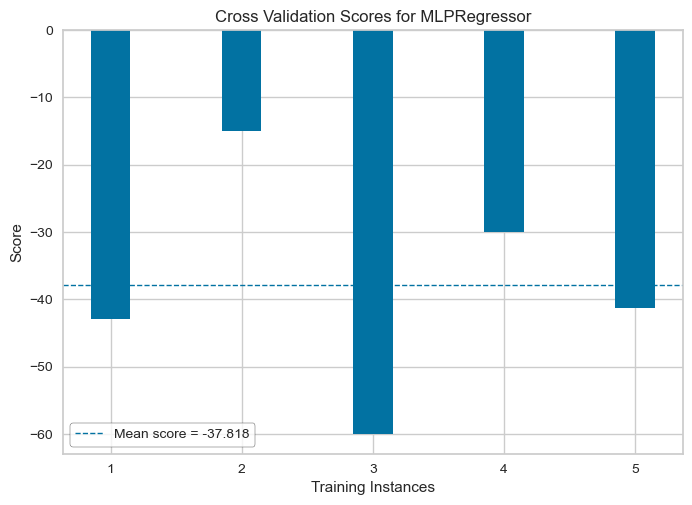

In [8]:
from yellowbrick.model_selection import cv_scores
visulazizer = cv_scores (final_model, X, y, cv=kfold, scoring="neg_mean_absolute_error")

Split the data into training and testing and calcuate metrics for testing dataset

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)
final_model_2=final_model.fit(X_train, y_train)
y_pred_test=final_model_2.predict (X_test)
r2_test=r2_score (y_pred_test, y_test)
rmse_test=mean_squared_error (y_pred_test, y_test, squared=False)
print (r2_test, rmse_test)


-218218741476.4755 81.02215821692822


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (521) reached and the optimization hasn't converged yet.
  warnings.warn(


metrics for training dataset

In [16]:
y_pred_train=final_model_2.predict (X_train)
r2_train=r2_score (y_pred_train, y_train)
rmse_train=mean_squared_error (y_pred_train, y_train, squared=False)
print (r2_train, rmse_test)

-17194261787.59397 81.02215821692822


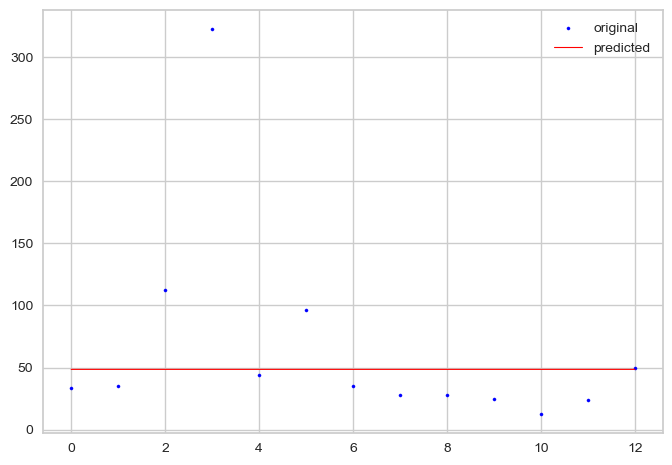

In [17]:
x_axes = range(len(y_pred_test))
plt.scatter(x_axes, y_test, s=5, color="blue", label="original")
plt.plot(x_axes, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


Predict with some points and export it as images 

In [7]:
data_1=rasterio.open ("D:/Mip and TSS Project/Python_SSC_MP_S2_Planetscope/SSC-S1/subset_4_of_26-12-2022.tif")
data_2=data_1.read ()
data_3=np.swapaxes (data_2, 0, 2)
data_3=np.swapaxes (data_3, 0, 1)
data_3 = data_3.reshape (data_3.shape [0]*data_3.shape [1], data_3.shape [2])
prediction = final_model.predict (data_3)
prediction=prediction.reshape (1,data_2.shape [1] , data_2.shape [2])
prediction=prediction.astype (np.int32)
with rasterio.open ("D:/Mip and TSS Project/Python_SSC_MP_S2_Planetscope/SSC-S1/SSC_S1_26-12-2022.tif", 'w',
                    driver="GTiff", 
                   width=data_2.shape [2], 
                   height=data_2.shape [1],
                   count=1, 
                   crs=data_1.crs, 
                   transform=data_1.transform, 
                   dtype=rasterio.int32) as dst:
    dst.write (prediction)